## Goller

CSV verileri:
Toplam oyuncu sayısı: 30
Sütunlar: ['Rank', 'Player', 'Club', 'Matches', 'Goals']

Resim linki olan oyuncular: 18
Eşleşen oyuncular:
- M.Salah
- A.Isak
- E.Haaland
- C.Wood
- B.Mbeumo
- Y.Wissa
- O.Watkins
- M.Cunha
- C.Palmer
- J.Larsen
- J.Mateta
- L.Diaz
- J.Bowen
- L.Delap
- R.Jiménez
- J.Kluivert
- K.Schade
- C.Gakpo
İşleniyor: M.Salah
İşleniyor: A.Isak
İşleniyor: E.Haaland
İşleniyor: C.Wood
İşleniyor: B.Mbeumo
İşleniyor: Y.Wissa
İşleniyor: O.Watkins
İşleniyor: M.Cunha
İşleniyor: C.Palmer
İşleniyor: J.Larsen
İşleniyor: J.Mateta
İşleniyor: L.Diaz
İşleniyor: J.Bowen
İşleniyor: L.Delap
İşleniyor: R.Jiménez
İşleniyor: J.Kluivert
İşleniyor: K.Schade
İşleniyor: C.Gakpo

Grafik hazır! 18 oyuncu gösteriliyor.


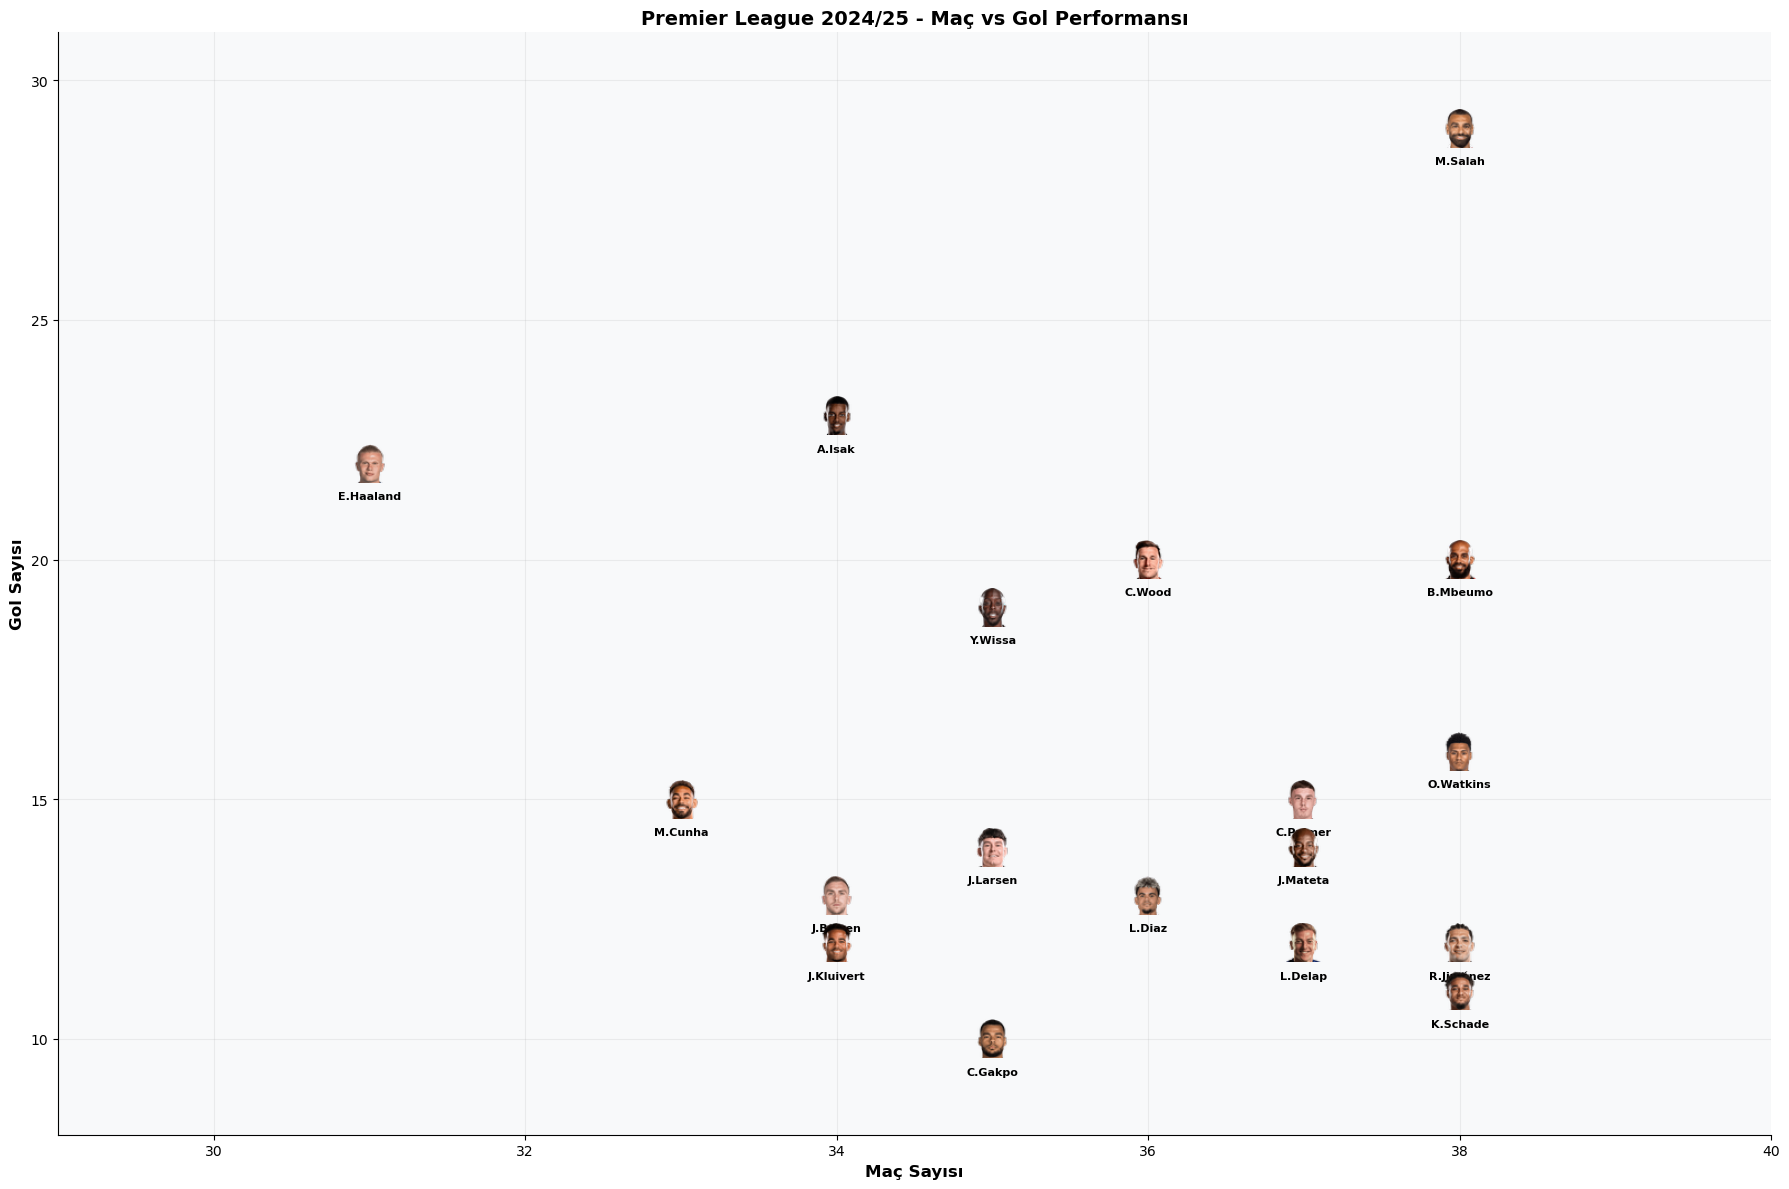


GRAFİKTE GÖSTERILEN OYUNCULAR:
 1. M.Salah         - 29 gol (38 maç)
 2. A.Isak          - 23 gol (34 maç)
 3. E.Haaland       - 22 gol (31 maç)
 4. C.Wood          - 20 gol (36 maç)
 5. B.Mbeumo        - 20 gol (38 maç)
 6. Y.Wissa         - 19 gol (35 maç)
 7. O.Watkins       - 16 gol (38 maç)
 8. M.Cunha         - 15 gol (33 maç)
 9. C.Palmer        - 15 gol (37 maç)
10. J.Larsen        - 14 gol (35 maç)
11. J.Mateta        - 14 gol (37 maç)
12. L.Diaz          - 13 gol (36 maç)
13. J.Bowen         - 13 gol (34 maç)
14. L.Delap         - 12 gol (37 maç)
15. R.Jiménez       - 12 gol (38 maç)
16. J.Kluivert      - 12 gol (34 maç)
19. K.Schade        - 11 gol (38 maç)
20. C.Gakpo         - 10 gol (35 maç)


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np


df = pd.read_csv("C:\\Users\\MONSTER\\Desktop\\fotmob stats\\goals.csv")


player_images = {
   'M.Salah': 'https://images.fotmob.com/image_resources/playerimages/292462.png',
'A.Isak': 'https://images.fotmob.com/image_resources/playerimages/690107.png',
'E.Haaland': 'https://images.fotmob.com/image_resources/playerimages/737066.png',
'C.Wood': 'https://images.fotmob.com/image_resources/playerimages/169719.png',
'B.Mbeumo': 'https://images.fotmob.com/image_resources/playerimages/923312.png',
'Y.Wissa': 'https://images.fotmob.com/image_resources/playerimages/666857.png',
'O.Watkins': 'https://images.fotmob.com/image_resources/playerimages/540088.png',
'M.Cunha': 'https://images.fotmob.com/image_resources/playerimages/863098.png',
'C.Palmer': 'https://images.fotmob.com/image_resources/playerimages/1096353.png',
'J.Larsen': 'https://images.fotmob.com/image_resources/playerimages/821100.png',
'J.Mateta': 'https://images.fotmob.com/image_resources/playerimages/706297.png',
'L.Diaz': 'https://images.fotmob.com/image_resources/playerimages/860914.png',
'J.Bowen': 'https://images.fotmob.com/image_resources/playerimages/523825.png',
'L.Delap': 'https://images.fotmob.com/image_resources/playerimages/1113903.png',
'R.Jiménez': 'https://images.fotmob.com/image_resources/playerimages/292313.png',
'J.Kluivert': 'https://images.fotmob.com/image_resources/playerimages/794253.png',
'A.Semedo': 'https://images.fotmob.com/image_resources/playerimages/933576.png',
'B.Jhonson': 'https://images.fotmob.com/image_resources/playerimages/1076756.png',
'K.Schade': 'https://images.fotmob.com/image_resources/playerimages/1083796.png',
'C.Gakpo': 'https://images.fotmob.com/image_resources/playerimages/806552.png'

}

def download_image(url, timeout=10):
    """Resmi güvenli bir şekilde indir"""
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        
        response = requests.get(url, headers=headers, timeout=timeout)
        response.raise_for_status()
        
        img = Image.open(BytesIO(response.content))
        
        if img.mode != 'RGBA':
            img = img.convert('RGBA')
            
        return img
        
    except Exception as e:
        print(f"Resim yükleme hatası: {e}")
        return None

def create_placeholder_image(size=(35, 35)):
    """Placeholder resim oluştur"""
    img = Image.new('RGBA', size, (200, 200, 200, 255))
    return img


print("CSV verileri:")
print(f"Toplam oyuncu sayısı: {len(df)}")
print(f"Sütunlar: {df.columns.tolist()}")


available_players = df[df['Player'].isin(player_images.keys())].copy()

print(f"\nResim linki olan oyuncular: {len(available_players)}")
print("Eşleşen oyuncular:")
for player in available_players['Player']:
    print(f"- {player}")

if len(available_players) == 0:
    print("\nEşleşen oyuncu bulunamadı!")
    print("CSV'deki oyuncular:")
    for player in df['Player'].head(10):
        print(f"- {player}")
    exit()


fig, ax = plt.subplots(figsize=(18, 12))


ax.set_facecolor('#f8f9fa')


for i, (_, player) in enumerate(available_players.iterrows()):
    print(f"İşleniyor: {player['Player']}")
    
    img_url = player_images.get(player['Player'])
    
    
    img = download_image(img_url)
    
    
    if img is None:
        print(f"Resim indirilemedi, placeholder kullanılıyor: {player['Player']}")
        img = create_placeholder_image()
    
    
    img = img.resize((35, 35), Image.Resampling.LANCZOS)
    
    
    x_pos = player['Matches']
    y_pos = player['Goals']
    
    
    try:
        imagebox = OffsetImage(img, zoom=0.8)
        ab = AnnotationBbox(imagebox, (x_pos, y_pos), 
                          frameon=False, pad=0.1)
        ax.add_artist(ab)
    except Exception as e:
        print(f"Resim ekleme hatası {player['Player']}: {e}")
    
    
    ax.annotate(player['Player'], 
                (x_pos, y_pos), 
                xytext=(0, -20), 
                textcoords='offset points',
                ha='center', va='top',
                fontsize=8, fontweight='bold')


ax.set_xlabel("Maç Sayısı", fontsize=12, fontweight='bold')
ax.set_ylabel("Gol Sayısı", fontsize=12, fontweight='bold')
ax.set_title("Premier League 2024/25 - Maç vs Gol Performansı", fontsize=14, fontweight='bold')


ax.grid(True, alpha=0.2)


ax.set_xlim(available_players['Matches'].min() - 2, available_players['Matches'].max() + 2)
ax.set_ylim(available_players['Goals'].min() - 2, available_players['Goals'].max() + 2)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.tight_layout()

print(f"\nGrafik hazır! {len(available_players)} oyuncu gösteriliyor.")

plt.show()


print("\n" + "="*50)
print("GRAFİKTE GÖSTERILEN OYUNCULAR:")
print("="*50)
for _, player in available_players.iterrows():
    print(f"{player['Rank']:2d}. {player['Player']:<15} - {player['Goals']} gol ({player['Matches']} maç)")

## Asistler

Çakışma tespit edildi: 36 maç, 10 asist - 2 oyuncu
  B.Fernandes: (36, 10) -> (36.00, 9.60)
  A.Robinson: (36, 10) -> (36.00, 10.40)
Çakışma tespit edildi: 34 maç, 8 asist - 3 oyuncu
  J.Bowen: (34, 8) -> (34.87, 8.00)
  E.Eze: (34, 8) -> (33.56, 8.75)
  M.Gibbs-White: (34, 8) -> (33.56, 7.25)
İşleniyor: M.Salah
İşleniyor: J.Murphy
İşleniyor: A.Elanga
İşleniyor: B.Fernandes
İşleniyor: B.Saka
İşleniyor: M.Damsgaard
İşleniyor: M.Rogers
İşleniyor: A.Robinson
İşleniyor: C.Palmer
İşleniyor: M.Odegaard
İşleniyor: J.Bowen
İşleniyor: E.Eze
İşleniyor: M.Gibbs-White
İşleniyor: O.Watkins
İşleniyor: B.Mbeumo
İşleniyor: K.De Bruyne
İşleniyor: E.Fernández
İşleniyor: J.Maddison

Grafik hazır! 18 oyuncu gösteriliyor.
Çakışan oyuncular ofset ile ayrıldı.


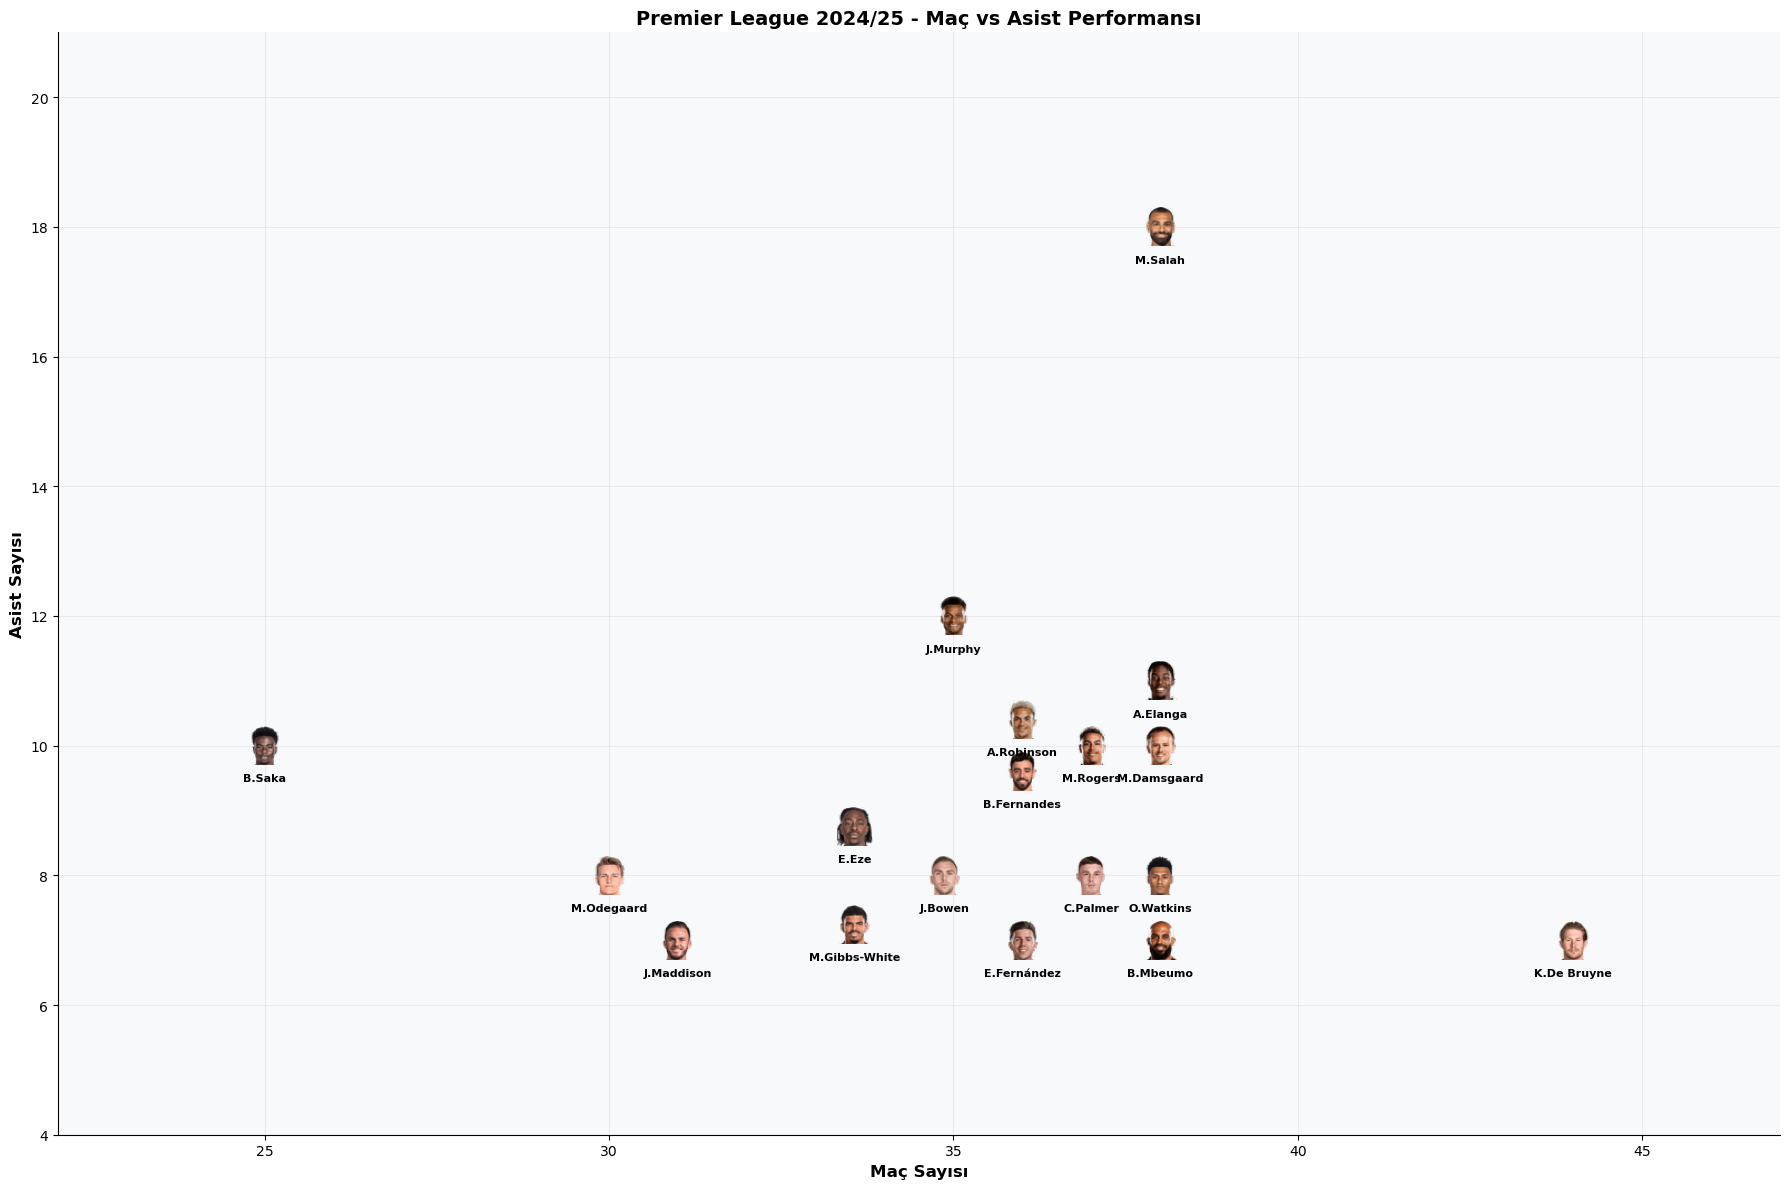


GRAFİKTE GÖSTERILEN OYUNCULAR:
 1. M.Salah                   - 18 asist (38 maç)
 2. J.Murphy                  - 12 asist (35 maç)
 3. A.Elanga                  - 11 asist (38 maç)
 4. B.Fernandes               - 10 asist (36 maç)
 5. B.Saka                    - 10 asist (25 maç)
 6. M.Damsgaard               - 10 asist (38 maç)
 7. M.Rogers                  - 10 asist (37 maç)
 8. A.Robinson                - 10 asist (36 maç)
10. C.Palmer                  - 8 asist (37 maç)
11. M.Odegaard                - 8 asist (30 maç)
12. J.Bowen                   - 8 asist (34 maç)
14. E.Eze                     - 8 asist (34 maç)
15. M.Gibbs-White             - 8 asist (34 maç)
16. O.Watkins                 - 8 asist (38 maç)
17. B.Mbeumo                  - 7 asist (38 maç)
18. K.De Bruyne               - 7 asist (44 maç)
19. E.Fernández               - 7 asist (36 maç)
20. J.Maddison                - 7 asist (31 maç)


In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
from collections import defaultdict


df = pd.read_csv("C:\\Users\\MONSTER\\Desktop\\fotmob stats\\assists.csv")


player_images = {
     'M.Salah': 'https://images.fotmob.com/image_resources/playerimages/292462.png',
    'J.Murphy': 'https://images.fotmob.com/image_resources/playerimages/521148.png',
    'A.Elanga': 'https://images.fotmob.com/image_resources/playerimages/1050166.png',
    'B.Fernandes': 'https://images.fotmob.com/image_resources/playerimages/422685.png',
    'B.Saka': 'https://images.fotmob.com/image_resources/playerimages/961995.png',
    'M.Damsgaard': 'https://images.fotmob.com/image_resources/playerimages/888912.png',
    'M.Rogers': 'https://images.fotmob.com/image_resources/playerimages/883080.png',
    'A.Robinson': 'https://images.fotmob.com/image_resources/playerimages/662428.png',
    'H.-M.Son': 'https://images.fotmob.com/image_resources/playerimages/212867.png',
    'C.Palmer': 'https://images.fotmob.com/image_resources/playerimages/1096353.png',
    'M.Odegaard': 'https://images.fotmob.com/image_resources/playerimages/534670.png',
    'J.Bowen': 'https://images.fotmob.com/image_resources/playerimages/523825.png',
    'Savinho': 'https://images.fotmob.com/image_resources/playerimages/1174337.png',
    'E.Eze': 'https://images.fotmob.com/image_resources/playerimages/818975.png',
    'M.Gibbs-White': 'https://images.fotmob.com/image_resources/playerimages/789502.png',
    'O.Watkins': 'https://images.fotmob.com/image_resources/playerimages/540088.png',
    'B.Mbeumo': 'https://images.fotmob.com/image_resources/playerimages/923312.png',
    'K.De Bruyne': 'https://images.fotmob.com/image_resources/playerimages/169200.png',
    'E.Fernández': 'https://images.fotmob.com/image_resources/playerimages/1137705.png',
    'J.Maddison': 'https://images.fotmob.com/image_resources/playerimages/493165.png'
}
def download_image(url, timeout=10):
    """Resmi güvenli bir şekilde indir"""
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        
        response = requests.get(url, headers=headers, timeout=timeout)
        response.raise_for_status()
        
        img = Image.open(BytesIO(response.content))
        
        if img.mode != 'RGBA':
            img = img.convert('RGBA')
            
        return img
        
    except Exception as e:
        print(f"Resim yükleme hatası: {e}")
        return None

def create_placeholder_image(size=(35, 35)):
    """Placeholder resim oluştur"""
    img = Image.new('RGBA', size, (200, 200, 200, 255))
    return img

def calculate_positions_with_offset(df, offset_distance=0.6):
    """
    Aynı koordinatlara sahip oyuncuları tespit et ve ofset uygula
    """
   
    position_groups = defaultdict(list)
    
    for idx, row in df.iterrows():
        key = (row['Matches'], row['Assists'])
        position_groups[key].append(idx)
    
   
    new_positions = {}
    
    for (matches, assists), indices in position_groups.items():
        if len(indices) == 1:
           
            new_positions[indices[0]] = (matches, assists)
        else:
            
            print(f"Çakışma tespit edildi: {matches} maç, {assists} asist - {len(indices)} oyuncu")
            
            if len(indices) == 2:
                
                vertical_spacing = 0.8  
                
                for i, idx in enumerate(indices):
                    x_offset = 0  
                    y_offset = vertical_spacing * (i - 0.5) 
                    
                    new_x = matches + x_offset
                    new_y = assists + y_offset
                    new_positions[idx] = (new_x, new_y)
                    
                    player_name = df.loc[idx, 'Player']
                    print(f"  {player_name}: ({matches}, {assists}) -> ({new_x:.2f}, {new_y:.2f})")
            else:
                
                for i, idx in enumerate(indices):
                    angle = 2 * np.pi * i / len(indices)
                    
                    
                    current_offset = offset_distance * (1 + len(indices) * 0.15)
                    
                    x_offset = current_offset * np.cos(angle)
                    y_offset = current_offset * np.sin(angle)
                    
                    new_x = matches + x_offset
                    new_y = assists + y_offset
                    new_positions[idx] = (new_x, new_y)
                    
                    player_name = df.loc[idx, 'Player']
                    print(f"  {player_name}: ({matches}, {assists}) -> ({new_x:.2f}, {new_y:.2f})")
    
    return new_positions


available_players = df[df['Player'].isin(player_images.keys())].copy()


new_positions = calculate_positions_with_offset(available_players)


fig, ax = plt.subplots(figsize=(18, 12))


ax.set_facecolor('#f8f9fa')


for i, (idx, player) in enumerate(available_players.iterrows()):
    print(f"İşleniyor: {player['Player']}")
    
    
    img_url = player_images.get(player['Player'])
    
   
    img = download_image(img_url)
    
    
    if img is None:
        print(f"Resim indirilemedi, placeholder kullanılıyor: {player['Player']}")
        img = create_placeholder_image()
    
    
    img = img.resize((35, 35), Image.Resampling.LANCZOS)
    
    
    x_pos, y_pos = new_positions[idx]
    
    
    try:
        imagebox = OffsetImage(img, zoom=0.8)
        ab = AnnotationBbox(imagebox, (x_pos, y_pos), 
                          frameon=False, pad=0.1)
        ax.add_artist(ab)
    except Exception as e:
        print(f"Resim ekleme hatası {player['Player']}: {e}")
    

    ax.annotate(player['Player'], 
                (x_pos, y_pos), 
                xytext=(0, -20), 
                textcoords='offset points',
                ha='center', va='top',
                fontsize=8, fontweight='bold')


ax.set_xlabel("Maç Sayısı", fontsize=12, fontweight='bold')
ax.set_ylabel("Asist Sayısı", fontsize=12, fontweight='bold')
ax.set_title("Premier League 2024/25 - Maç vs Asist Performansı", fontsize=14, fontweight='bold')


ax.grid(True, alpha=0.2)


ax.set_xlim(available_players['Matches'].min() - 3, available_players['Matches'].max() + 3)
ax.set_ylim(available_players['Assists'].min() - 3, available_players['Assists'].max() + 3)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.tight_layout()

print(f"\nGrafik hazır! {len(available_players)} oyuncu gösteriliyor.")
print("Çakışan oyuncular ofset ile ayrıldı.")

plt.show()


print("\n" + "="*50)
print("GRAFİKTE GÖSTERILEN OYUNCULAR:")
print("="*50)
for _, player in available_players.iterrows():
    print(f"{player['Rank']:2d}. {player['Player']:<25} - {player['Assists']} asist ({player['Matches']} maç)")

## Yaratılan Büyük Fırsatlar

İşleniyor: M.Salah
İşleniyor: C.Palmer
İşleniyor: B.Saka
İşleniyor: B.Mbeumo
İşleniyor: I.Sarr
İşleniyor: J.Murphy
İşleniyor: B.Fernandes
İşleniyor: M.Rogers
İşleniyor: H.Son
İşleniyor: Y.Tielemans
İşleniyor: T.Alexander-Arnold
İşleniyor: L.Digne
İşleniyor: K.De Bruyne
İşleniyor: M.Damsgaard
İşleniyor: M.Odegaard

Grafik hazır! 15 oyuncu gösteriliyor.
CSV dosyasından 27 oyuncu yüklendi.
Resim linki olan oyuncu sayısı: 27

TOP 15 BIG CHANCES CREATED:
 1. M.Salah              | Liverpool          | 27.0 büyük fırsat
 2. C.Palmer             | Chelsea            | 24.0 büyük fırsat
 3. B.Saka               | Arsenal            | 21.0 büyük fırsat
 4. B.Mbeumo             | Brentford          | 17.0 büyük fırsat
 5. I.Sarr               | Marseille          | 17.0 büyük fırsat
 6. J.Murphy             | Newcastle United   | 16.0 büyük fırsat
 7. B.Fernandes          | Manchester United  | 16.0 büyük fırsat
 8. M.Rogers             | Aston Villa        | 16.0 büyük fırsat
 9. H.Son         

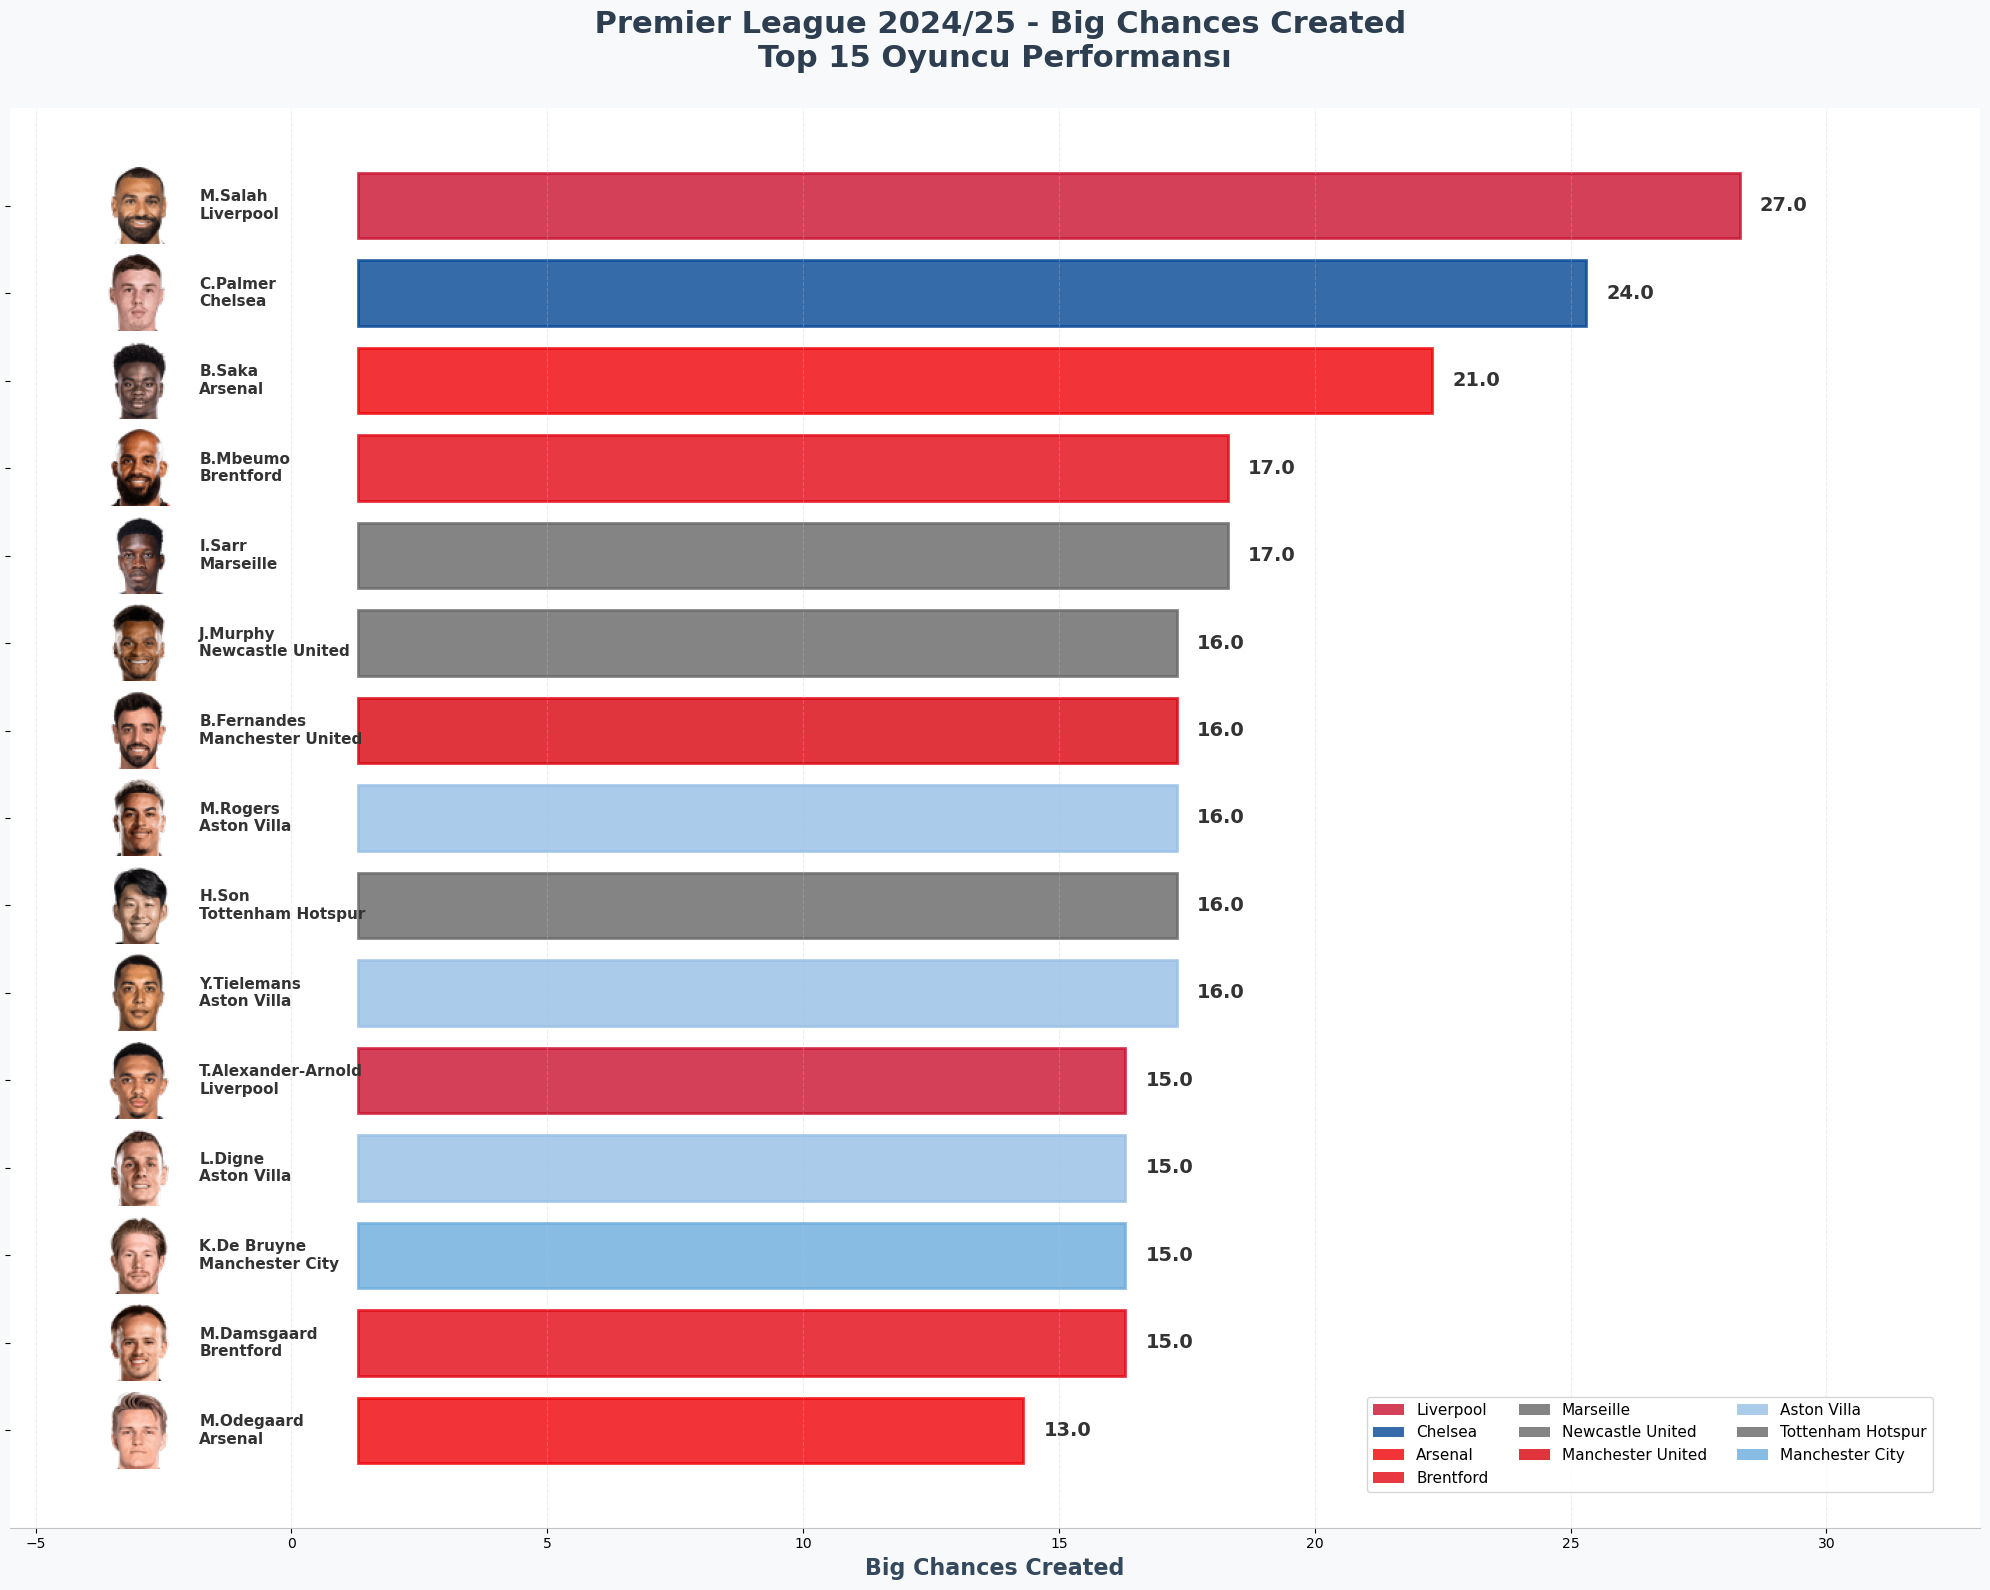


KULÜP BAZINDA ANALİZ:
                   Toplam  Ortalama  Oyuncu_Sayısı
Club                                              
Aston Villa          47.0      15.7              3
Liverpool            42.0      21.0              2
Arsenal              34.0      17.0              2
Brentford            32.0      16.0              2
Chelsea              24.0      24.0              1
Marseille            17.0      17.0              1
Manchester United    16.0      16.0              1
Newcastle United     16.0      16.0              1
Tottenham Hotspur    16.0      16.0              1
Manchester City      15.0      15.0              1

CSV DOSYASI BİLGİLERİ:
Toplam oyuncu sayısı: 27
Kolonlar: ['Rank', 'Player', 'Big_Chances', 'Club']
En yüksek değer: 27.0
En düşük değer: 11.0
Ortalama: 14.9


In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import numpy as np


df = pd.read_csv("C:\\Users\\MONSTER\\Desktop\\fotmob stats\\big_chances_created_stats.csv")


required_columns = ['Player', 'Big_Chances_Created']  
if not all(col in df.columns for col in required_columns):
    print("HATA: CSV dosyasında şu kolonlar bulunmalı:")
    print("- Player (oyuncu adı)")
    print("- Big_Chances_Created (büyük fırsat sayısı)")
    print(f"Mevcut kolonlar: {list(df.columns)}")
    exit()


if 'Big_Chances_Created' in df.columns:
    df = df.rename(columns={'Big_Chances_Created': 'Big_Chances'})


if 'Club' not in df.columns:
    print("Club kolonu bulunamadı, oyunculara göre kulüp ataması yapılıyor...")
    
    player_clubs = {
        'M.Salah': 'Liverpool', 'C.Palmer': 'Chelsea', 'B.Fernandes': 'Manchester United',
        'B.Saka': 'Arsenal', 'M.Odegaard': 'Arsenal', 'K.De Bruyne': 'Manchester City',
        'T.Alexander-Arnold': 'Liverpool', 'H.-M.Son': 'Tottenham', 'J.Maddison': 'Tottenham',
        'J.Bowen': 'West Ham', 'E.Eze': 'Crystal Palace', 'M.Gibbs-White': 'Nottingham Forest',
        'O.Watkins': 'Aston Villa', 'Savinho': 'Manchester City', 'A.Elanga': 'Nottingham Forest',
        'J.Murphy': 'Newcastle', 'M.Damsgaard': 'Brentford', 'B.Mbeumo': 'Brentford',
        'A.Robinson': 'Fulham', 'E.Fernández': 'Chelsea'
    }
    df['Club'] = df['Player'].map(player_clubs).fillna('Unknown')


club_colors = {
    'Liverpool': '#C8102E',
    'Chelsea': '#034694',
    'Manchester United': '#DA020E',
    'Arsenal': '#EF0107',
    'Manchester City': '#6CABDD',
    'Tottenham': '#132257',
    'West Ham': '#7A263A',
    'Crystal Palace': '#1B458F',
    'Nottingham Forest': '#DD0000',
    'Aston Villa': '#95BFE5',
    'Newcastle': '#241F20',
    'Brentford': '#E30613',
    'Fulham': '#000000',
    'Brighton': '#0057B8'
}


player_images = {
    'M.Salah': 'https://images.fotmob.com/image_resources/playerimages/292462.png',
    'C.Palmer': 'https://images.fotmob.com/image_resources/playerimages/1096353.png',
    'B.Saka': 'https://images.fotmob.com/image_resources/playerimages/961995.png',
    'B.Mbeumo': 'https://images.fotmob.com/image_resources/playerimages/923312.png',
    'I.Sarr': 'https://images.fotmob.com/image_resources/playerimages/771294.png',         
    'J.Murphy': 'https://images.fotmob.com/image_resources/playerimages/521148.png',
    'B.Fernandes': 'https://images.fotmob.com/image_resources/playerimages/422685.png',
    'M.Rogers': 'https://images.fotmob.com/image_resources/playerimages/883080.png',
    'H.Son': 'https://images.fotmob.com/image_resources/playerimages/212867.png',           
    'Y.Tielemans': 'https://images.fotmob.com/image_resources/playerimages/465960.png',    
    'M.Damsgaard': 'https://images.fotmob.com/image_resources/playerimages/888912.png',
    'K.De Bruyne': 'https://images.fotmob.com/image_resources/playerimages/169200.png',
    'T.Alexander-Arnold': 'https://images.fotmob.com/image_resources/playerimages/760712.png',
    'L.Digne': 'https://images.fotmob.com/image_resources/playerimages/210111.png',
    'M.Odegaard': 'https://images.fotmob.com/image_resources/playerimages/534670.png',
    'E.Fernandez': 'https://images.fotmob.com/image_resources/playerimages/1137705.png',
    'L.Trossard': 'https://images.fotmob.com/image_resources/playerimages/318615.png',
    'M.Cunha': 'https://images.fotmob.com/image_resources/playerimages/863098.png',
    'B.Guimaraes': 'https://images.fotmob.com/image_resources/playerimages/850354.png',
    'D.Szoboszlai': 'https://images.fotmob.com/image_resources/playerimages/846005.png',
    'D.McNeil': 'https://images.fotmob.com/image_resources/playerimages/939542.png',
    'L.Davis': 'https://images.fotmob.com/image_resources/playerimages/980381.png',
    'E.Eze': 'https://images.fotmob.com/image_resources/playerimages/818975.png',
    'J.Bowen': 'https://images.fotmob.com/image_resources/playerimages/523825.png',
    'S.Savinho': 'https://images.fotmob.com/image_resources/playerimages/1174337.png',
    'A.Traore': 'https://images.fotmob.com/image_resources/playerimages/493647.png',
    'A.Isak': 'https://images.fotmob.com/image_resources/playerimages/690107.png'
}

def download_image(url, timeout=10):
    """Resmi güvenli bir şekilde indir"""
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        
        response = requests.get(url, headers=headers, timeout=timeout)
        response.raise_for_status()
        
        img = Image.open(BytesIO(response.content))
        
        if img.mode != 'RGBA':
            img = img.convert('RGBA')
            
        return img
        
    except Exception as e:
        print(f"Resim yükleme hatası: {e}")
        return None

def create_placeholder_image(size=(60, 60)):
    """Placeholder resim oluştur"""
    img = Image.new('RGBA', size, (200, 200, 200, 255))
    return img


df_sorted = df.sort_values('Big_Chances', ascending=False)
available_players = df_sorted[df_sorted['Player'].isin(player_images.keys())].head(15).copy()


fig, ax = plt.subplots(figsize=(20, 16))


fig.patch.set_facecolor('#f8f9fa')
ax.set_facecolor('#ffffff')


y_positions = np.arange(len(available_players)) * 1.2
bar_heights = available_players['Big_Chances'].values


bar_colors = [club_colors.get(club, '#666666') for club in available_players['Club']]


bars = ax.barh(y_positions, bar_heights, left=1.3, color=bar_colors, alpha=0.8, 
               edgecolor='white', linewidth=2, height=0.9)


for i, (bar, color) in enumerate(zip(bars, bar_colors)):
    
    bar.set_color(color)
    
   
    value = bar_heights[i]
    ax.text(value + 1.7, bar.get_y() + bar.get_height()/2, 
            f'{value}', ha='left', va='center', 
            fontweight='bold', fontsize=14, color='#333333')

for i, (idx, player) in enumerate(available_players.iterrows()):
    print(f"İşleniyor: {player['Player']}")
    
   
    img_url = player_images.get(player['Player'])
    
   
    img = download_image(img_url)
    
   
    if img is None:
        print(f"Resim indirilemedi, placeholder kullanılıyor: {player['Player']}")
        img = create_placeholder_image()
    
  
    img = img.resize((55, 55), Image.Resampling.LANCZOS)
    
    
    try:
        from matplotlib.offsetbox import OffsetImage, AnnotationBbox
        imagebox = OffsetImage(img, zoom=1.0)
        ab = AnnotationBbox(imagebox, (-3, y_positions[i]), 
                          frameon=False, pad=0.1)
        ax.add_artist(ab)
    except Exception as e:
        print(f"Resim ekleme hatası {player['Player']}: {e}")
    
   
    player_name = player['Player']
    club_name = player['Club'] if 'Club' in player.index else 'Unknown'
    extra_info = ""
    
   
    if 'Assists' in player.index and 'Goals' in player.index:
        extra_info = f"\nA:{player['Assists']} G:{player['Goals']}"
    
    ax.text(-1.8, y_positions[i], f"{player_name}\n{club_name}{extra_info}", 
            ha='left', va='center', fontsize=11, fontweight='bold',
            color='#333333')


ax.set_title(' Premier League 2024/25 - Big Chances Created\nTop 15 Oyuncu Performansı', 
             fontsize=22, fontweight='bold', pad=30, color='#2c3e50')

ax.set_xlabel('Big Chances Created', fontsize=16, fontweight='bold', color='#34495e')
ax.set_ylabel('')


ax.set_yticks(y_positions)
ax.set_yticklabels([])  


ax.set_xlim(-5.5, max(bar_heights) + 6)


ax.grid(axis='x', alpha=0.3, linestyle='--', color='#bdc3c7')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#bdc3c7')


ax.invert_yaxis()


unique_clubs = available_players['Club'].unique()
legend_elements = []
for club in unique_clubs:
    color = club_colors.get(club, '#666666')
    legend_elements.append(plt.Rectangle((0,0),1,1, facecolor=color, alpha=0.8))

ax.legend(legend_elements, unique_clubs, loc='lower right', 
          bbox_to_anchor=(0.98, 0.02), ncol=3, fontsize=11)


plt.tight_layout()

print(f"\nGrafik hazır! {len(available_players)} oyuncu gösteriliyor.")
print(f"CSV dosyasından {len(df)} oyuncu yüklendi.")
print(f"Resim linki olan oyuncu sayısı: {len(df[df['Player'].isin(player_images.keys())])}")
print("\n" + "="*60)
print("TOP 15 BIG CHANCES CREATED:")
print("="*60)
for i, (_, player) in enumerate(available_players.iterrows()):
    extra_stats = ""
    if 'Assists' in player.index and 'Goals' in player.index:
        extra_stats = f" | Asist: {player['Assists']}, Gol: {player['Goals']}"
    
    print(f"{i+1:2d}. {player['Player']:<20} | {player['Club']:<18} | {player['Big_Chances']} büyük fırsat{extra_stats}")

plt.show()


if 'Club' in df.columns:
    print("\n" + "="*60)
    print("KULÜP BAZINDA ANALİZ:")
    print("="*60)
    club_analysis = available_players.groupby('Club').agg({
        'Big_Chances': ['sum', 'mean', 'count']
    }).round(1)
    club_analysis.columns = ['Toplam', 'Ortalama', 'Oyuncu_Sayısı']
    print(club_analysis.sort_values('Toplam', ascending=False))

print("\n" + "="*60)
print("CSV DOSYASI BİLGİLERİ:")
print("="*60)
print(f"Toplam oyuncu sayısı: {len(df)}")
print(f"Kolonlar: {list(df.columns)}")
print(f"En yüksek değer: {df['Big_Chances'].max()}")
print(f"En düşük değer: {df['Big_Chances'].min()}")
print(f"Ortalama: {df['Big_Chances'].mean():.1f}")

## Gol Yenmeyen Maç (Clean Sheet)

İşleniyor: D.Raya
İşleniyor: M.Sels
İşleniyor: J.Pickford
İşleniyor: D.Henderson
İşleniyor: E.Moraes
İşleniyor: R.Sanchez
İşleniyor: A.Becker
İşleniyor: A.Onana
İşleniyor: N.Pope
İşleniyor: E.Martinez
İşleniyor: J.Sa
İşleniyor: M.Flekken
İşleniyor: B.Verbruggen
İşleniyor: B.Leno
İşleniyor: M.Dubravka

Grafik hazır! 15 kaleci gösteriliyor.
CSV dosyasından 27 kaleci yüklendi.
Resim linki olan kaleci sayısı: 27

TOP 15 CLEAN SHEETS:
 1. D.Raya               | Arsenal                   | 13 temiz çarşaf
 2. M.Sels               | Nottingham Forest         | 13 temiz çarşaf
 3. J.Pickford           | Everton                   | 12 temiz çarşaf
 4. D.Henderson          | Crystal Palace            | 11 temiz çarşaf
 5. E.Moraes             | Manchester City           | 10 temiz çarşaf
 6. R.Sanchez            | Chelsea                   | 10 temiz çarşaf
 7. A.Becker             | Liverpool                 | 9 temiz çarşaf
 8. A.Onana              | Manchester United         | 9 temiz çarşaf


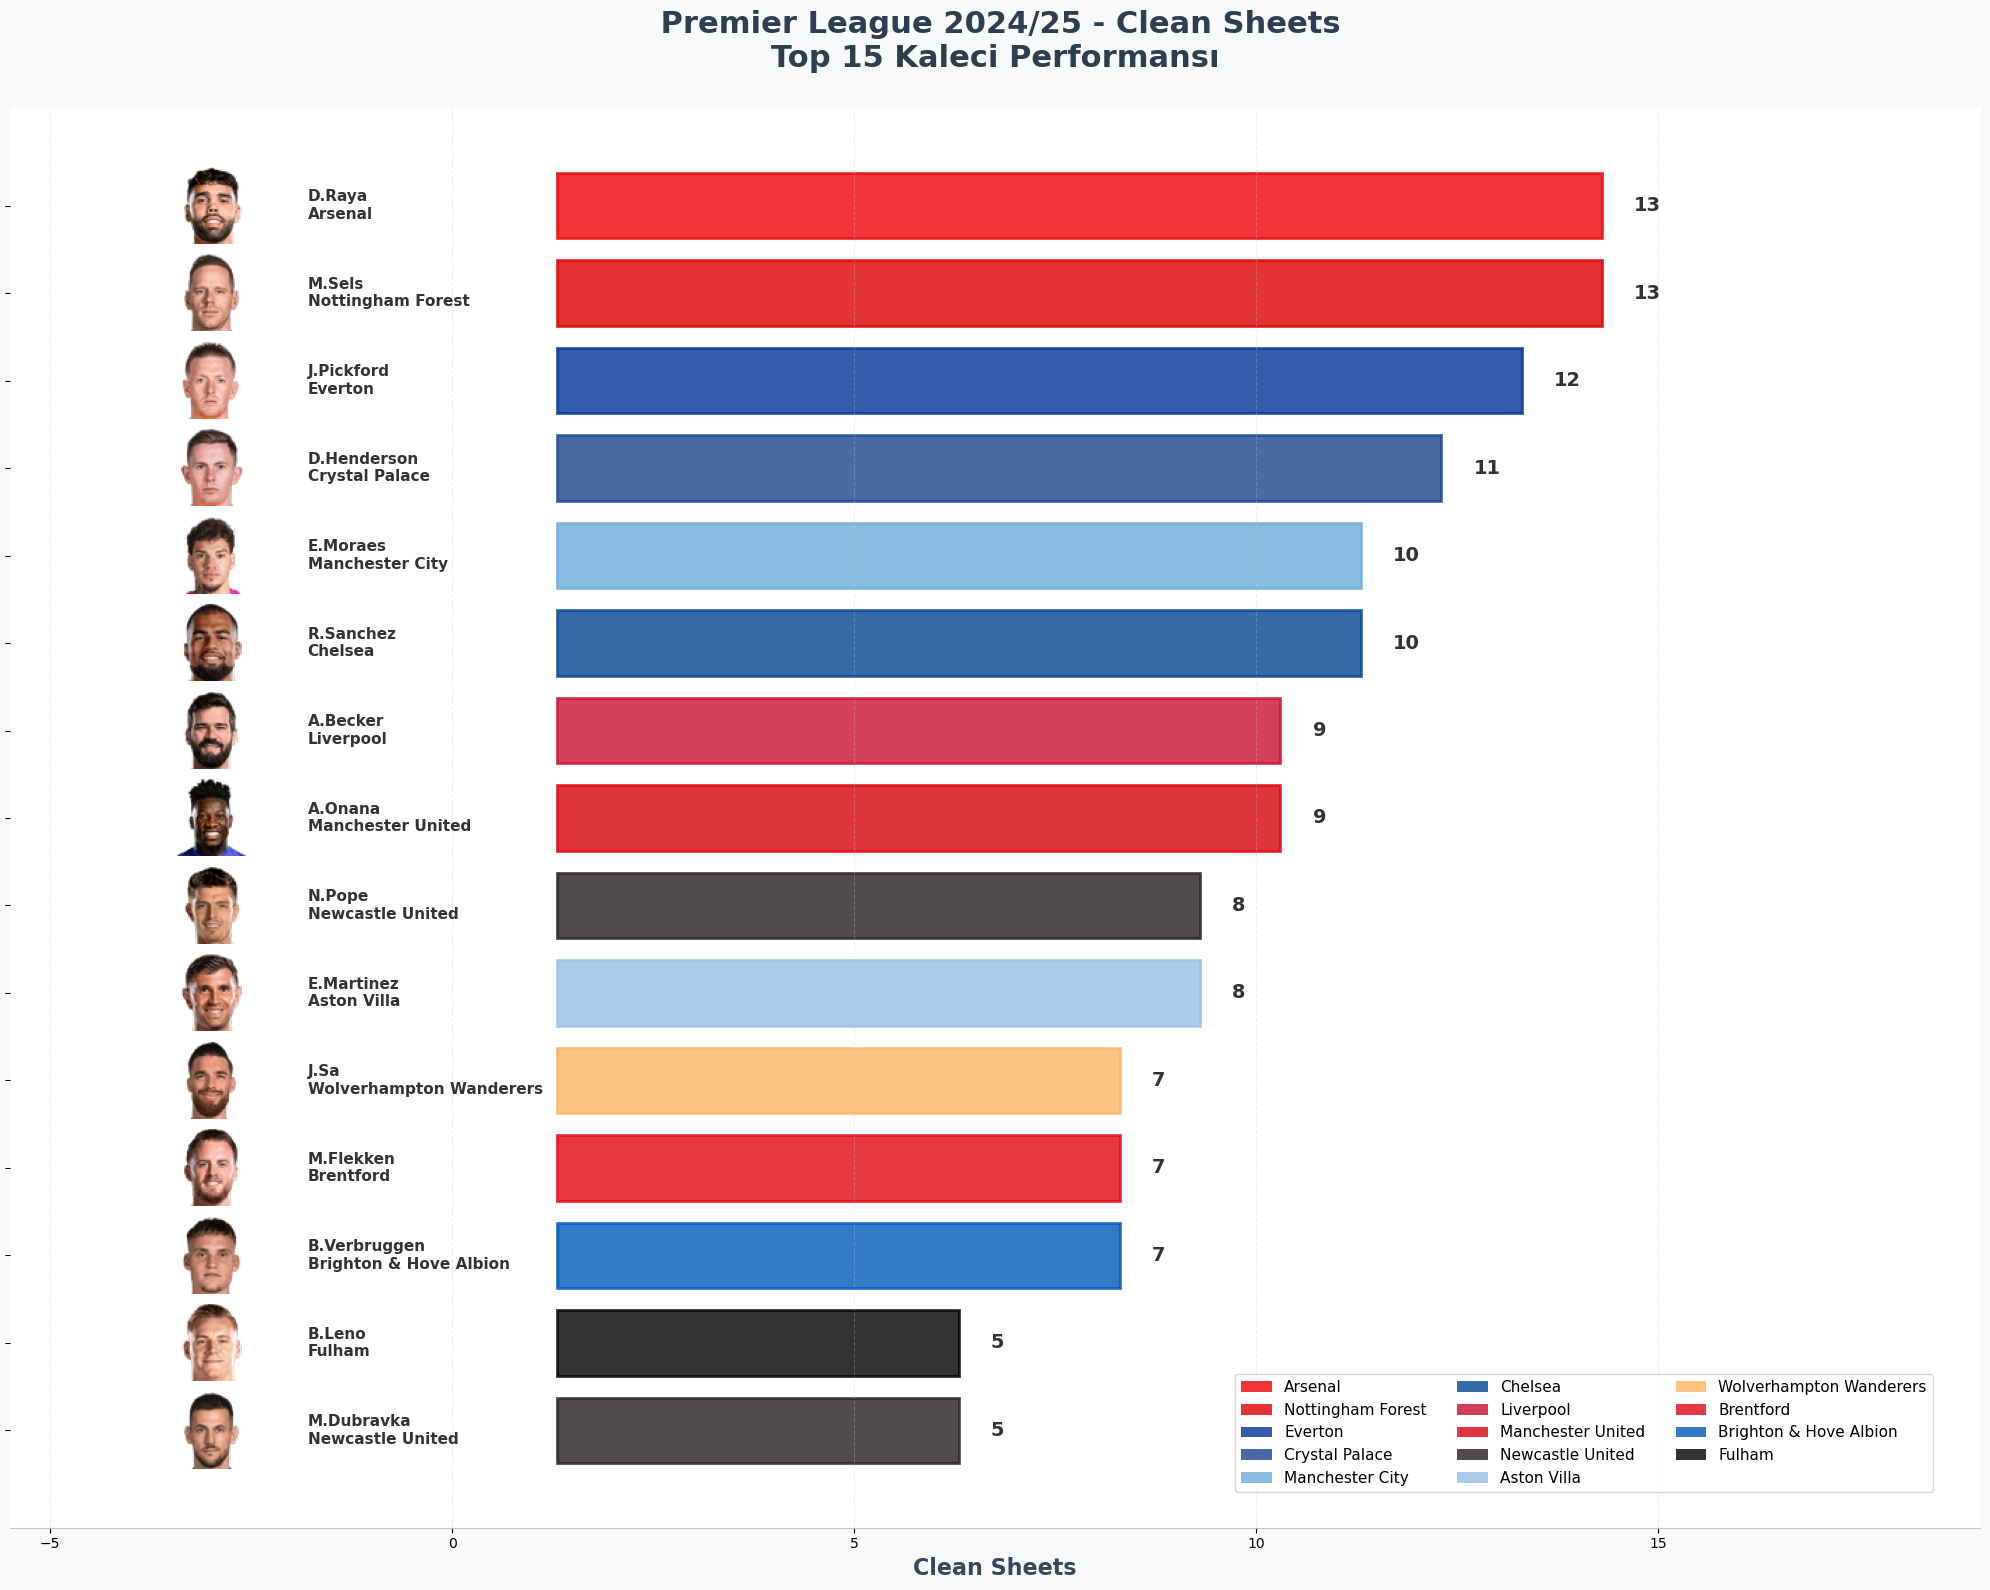


KULÜP BAZINDA ANALİZ:
                         Toplam  Ortalama  Kaleci_Sayısı
Club                                                    
Arsenal                    13.0      13.0              1
Newcastle United           13.0       6.5              2
Nottingham Forest          13.0      13.0              1
Everton                    12.0      12.0              1
Crystal Palace             11.0      11.0              1
Chelsea                    10.0      10.0              1
Manchester City            10.0      10.0              1
Liverpool                   9.0       9.0              1
Manchester United           9.0       9.0              1
Aston Villa                 8.0       8.0              1
Brentford                   7.0       7.0              1
Brighton & Hove Albion      7.0       7.0              1
Wolverhampton Wanderers     7.0       7.0              1
Fulham                      5.0       5.0              1

CSV DOSYASI BİLGİLERİ:
Toplam kaleci sayısı: 27
Kolonlar: ['Rank

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import numpy as np


df = pd.read_csv("C:\\Users\\MONSTER\\Desktop\\fotmob stats\\clean_sheets_stats.csv")

required_columns = ['Player', 'Clean_Sheets']  
if not all(col in df.columns for col in required_columns):
    print("HATA: CSV dosyasında şu kolonlar bulunmalı:")
    print("- Player (oyuncu adı)")
    print("- Clean_Sheets (temiz çarşaf sayısı)")
    print(f"Mevcut kolonlar: {list(df.columns)}")
    exit()


club_colors = {
    'Arsenal': '#EF0107',
    'Nottingham Forest': '#DD0000',
    'Everton': '#003399',
    'Crystal Palace': '#1B458F',
    'Manchester City': '#6CABDD',
    'Chelsea': '#034694',
    'Liverpool': '#C8102E',
    'Manchester United': '#DA020E',
    'Newcastle United': '#241F20',
    'Aston Villa': '#95BFE5',
    'Wolverhampton Wanderers': '#FDB462',
    'Brentford': '#E30613',
    'Brighton & Hove Albion': '#0057B8',
    'Fulham': '#000000',
    'Tottenham Hotspur': '#132257',
    'West Ham United': '#7A263A',
    'Leicester City': '#003090',
    'AFC Bournemouth': '#DA020E'
}


player_images = {
    'D.Raya': 'https://images.fotmob.com/image_resources/playerimages/562727.png',
    'M.Sels': 'https://images.fotmob.com/image_resources/playerimages/181069.png',
    'J.Pickford': 'https://images.fotmob.com/image_resources/playerimages/303919.png',
    'D.Henderson': 'https://images.fotmob.com/image_resources/playerimages/719330.png',
    'E.Moraes': 'https://images.fotmob.com/image_resources/playerimages/363364.png',
    'R.Sanchez': 'https://images.fotmob.com/image_resources/playerimages/789571.png',
    'A.Becker': 'https://images.fotmob.com/image_resources/playerimages/319784.png',
    'A.Onana': 'https://images.fotmob.com/image_resources/playerimages/611491.png',
    'N.Pope': 'https://images.fotmob.com/image_resources/playerimages/280484.png',
    'E.Martinez': 'https://images.fotmob.com/image_resources/playerimages/268375.png',
    'J.Sa': 'https://images.fotmob.com/image_resources/playerimages/416175.png',
    'M.Flekken': 'https://images.fotmob.com/image_resources/playerimages/330643.png',
    'B.Verbruggen': 'https://images.fotmob.com/image_resources/playerimages/1131987.png',
    'M.Dubravka': 'https://images.fotmob.com/image_resources/playerimages/72241.png',
    'B.Leno': 'https://images.fotmob.com/image_resources/playerimages/215168.png',
    'C.Kelleher': 'https://images.fotmob.com/image_resources/playerimages/776689.png',
    'G.Vicario': 'https://images.fotmob.com/image_resources/playerimages/538501.png',
    'A.Areola': 'https://images.fotmob.com/image_resources/playerimages/210164.png',
    'A.Ramsdale': 'https://images.fotmob.com/image_resources/playerimages/746395.png',
    'J.Stolarczyk': 'https://images.fotmob.com/image_resources/playerimages/1096327.png',
    'L.Fabianski': 'https://images.fotmob.com/image_resources/playerimages/30973.png',
    'J.Steele': 'https://images.fotmob.com/image_resources/playerimages/107917.png',
    'D.Bentley': 'https://images.fotmob.com/image_resources/playerimages/189103.png',
    'M.Travers': 'https://images.fotmob.com/image_resources/playerimages/731855.png',
    'R.Olsen': 'https://images.fotmob.com/image_resources/playerimages/120569.png',
    'F.Jorgensen': 'https://images.fotmob.com/image_resources/playerimages/1200984.png',
    'A.Bayindir': 'https://images.fotmob.com/image_resources/playerimages/866967.png'
}

def download_image(url, timeout=10):
    """Resmi güvenli bir şekilde indir"""
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        
        response = requests.get(url, headers=headers, timeout=timeout)
        response.raise_for_status()
        
        img = Image.open(BytesIO(response.content))
        
        if img.mode != 'RGBA':
            img = img.convert('RGBA')
            
        return img
        
    except Exception as e:
        print(f"Resim yükleme hatası: {e}")
        return None

def create_placeholder_image(size=(60, 60)):
    """Placeholder resim oluştur"""
    img = Image.new('RGBA', size, (200, 200, 200, 255))
    return img


df_sorted = df.sort_values('Clean_Sheets', ascending=False)
available_players = df_sorted[df_sorted['Player'].isin(player_images.keys())].head(15).copy()


fig, ax = plt.subplots(figsize=(20, 16))


fig.patch.set_facecolor('#f8f9fa')
ax.set_facecolor('#ffffff')


y_positions = np.arange(len(available_players)) * 1.2
bar_heights = available_players['Clean_Sheets'].values


bar_colors = [club_colors.get(club, '#666666') for club in available_players['Club']]


bars = ax.barh(y_positions, bar_heights, left=1.3, color=bar_colors, alpha=0.8, 
               edgecolor='white', linewidth=2, height=0.9)


for i, (bar, color) in enumerate(zip(bars, bar_colors)):
    
    bar.set_color(color)
    
    
    value = bar_heights[i]
    ax.text(value + 1.7, bar.get_y() + bar.get_height()/2, 
            f'{int(value)}', ha='left', va='center', 
            fontweight='bold', fontsize=14, color='#333333')


for i, (idx, player) in enumerate(available_players.iterrows()):
    print(f"İşleniyor: {player['Player']}")
    
    
    img_url = player_images.get(player['Player'])
    
   
    img = download_image(img_url)
    
    
    if img is None:
        print(f"Resim indirilemedi, placeholder kullanılıyor: {player['Player']}")
        img = create_placeholder_image()
    
   
    img = img.resize((55, 55), Image.Resampling.LANCZOS)
    
   
    try:
        from matplotlib.offsetbox import OffsetImage, AnnotationBbox
        imagebox = OffsetImage(img, zoom=1.0)
        ab = AnnotationBbox(imagebox, (-3, y_positions[i]), 
                          frameon=False, pad=0.1)
        ax.add_artist(ab)
    except Exception as e:
        print(f"Resim ekleme hatası {player['Player']}: {e}")
    
    
    player_name = player['Player']
    club_name = player['Club'] if 'Club' in player.index else 'Unknown'
    
    ax.text(-1.8, y_positions[i], f"{player_name}\n{club_name}", 
            ha='left', va='center', fontsize=11, fontweight='bold',
            color='#333333')


ax.set_title(' Premier League 2024/25 - Clean Sheets\nTop 15 Kaleci Performansı', 
             fontsize=22, fontweight='bold', pad=30, color='#2c3e50')

ax.set_xlabel('Clean Sheets', fontsize=16, fontweight='bold', color='#34495e')
ax.set_ylabel('')


ax.set_yticks(y_positions)
ax.set_yticklabels([]) 


ax.set_xlim(-5.5, max(bar_heights) + 6)


ax.grid(axis='x', alpha=0.3, linestyle='--', color='#bdc3c7')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#bdc3c7')


ax.invert_yaxis()


unique_clubs = available_players['Club'].unique()
legend_elements = []
for club in unique_clubs:
    color = club_colors.get(club, '#666666')
    legend_elements.append(plt.Rectangle((0,0),1,1, facecolor=color, alpha=0.8))

ax.legend(legend_elements, unique_clubs, loc='lower right', 
          bbox_to_anchor=(0.98, 0.02), ncol=3, fontsize=11)


plt.tight_layout()

print(f"\nGrafik hazır! {len(available_players)} kaleci gösteriliyor.")
print(f"CSV dosyasından {len(df)} kaleci yüklendi.")
print(f"Resim linki olan kaleci sayısı: {len(df[df['Player'].isin(player_images.keys())])}")
print("\n" + "="*60)
print("TOP 15 CLEAN SHEETS:")
print("="*60)
for i, (_, player) in enumerate(available_players.iterrows()):
    print(f"{i+1:2d}. {player['Player']:<20} | {player['Club']:<25} | {int(player['Clean_Sheets'])} temiz çarşaf")

plt.show()


if 'Club' in df.columns:
    print("\n" + "="*60)
    print("KULÜP BAZINDA ANALİZ:")
    print("="*60)
    club_analysis = available_players.groupby('Club').agg({
        'Clean_Sheets': ['sum', 'mean', 'count']
    }).round(1)
    club_analysis.columns = ['Toplam', 'Ortalama', 'Kaleci_Sayısı']
    print(club_analysis.sort_values('Toplam', ascending=False))

print("\n" + "="*60)
print("CSV DOSYASI BİLGİLERİ:")
print("="*60)
print(f"Toplam kaleci sayısı: {len(df)}")
print(f"Kolonlar: {list(df.columns)}")
print(f"En yüksek değer: {df['Clean_Sheets'].max()}")
print(f"En düşük değer: {df['Clean_Sheets'].min()}")
print(f"Ortalama: {df['Clean_Sheets'].mean():.1f}")

## 90 Dakika Başına Çalım

CSV'deki kulüp isimleri:
'Manchester City  ' → 'Manchester City' → #6CABDD
'Arsenal  ' → 'Arsenal' → #EF0107
'West Ham United  ' → 'West Ham United' → #7A263A
'Brighton & Hove Albion  ' → 'Brighton & Hove Albion' → #0057B8
'Nottingham Forest  ' → 'Nottingham Forest' → #DD0000
'Everton' → 'Everton' → #003399
'Southampton  ' → 'Southampton' → #D71920
'Fulham  ' → 'Fulham' → #FF6600
'Crystal Palace  ' → 'Crystal Palace' → #1B458F
'Wolverhampton Wanderers  ' → 'Wolverhampton Wanderers' → #FDB462
'Liverpool  ' → 'Liverpool' → #C8102E
'Chelsea  ' → 'Chelsea' → #034694
'Leicester City  ' → 'Leicester City' → #003090
'Luton Town  ' → 'Luton Town' → #F78F1E
'Tottenham Hotspur  ' → 'Tottenham Hotspur' → #132257
'AFC Bournemouth  ' → 'AFC Bournemouth' → #DA020E
'Manchester United  ' → 'Manchester United' → #DA020E
'Aston Villa  ' → 'Aston Villa' → #95BFE5
'Ipswich Town  ' → 'Ipswich Town' → #0E63A6
Kulüp: 'Manchester City  ' → Normalize: 'Manchester City' → Renk: #6CABDD
Kulüp: 'Arsenal  ' → Norm

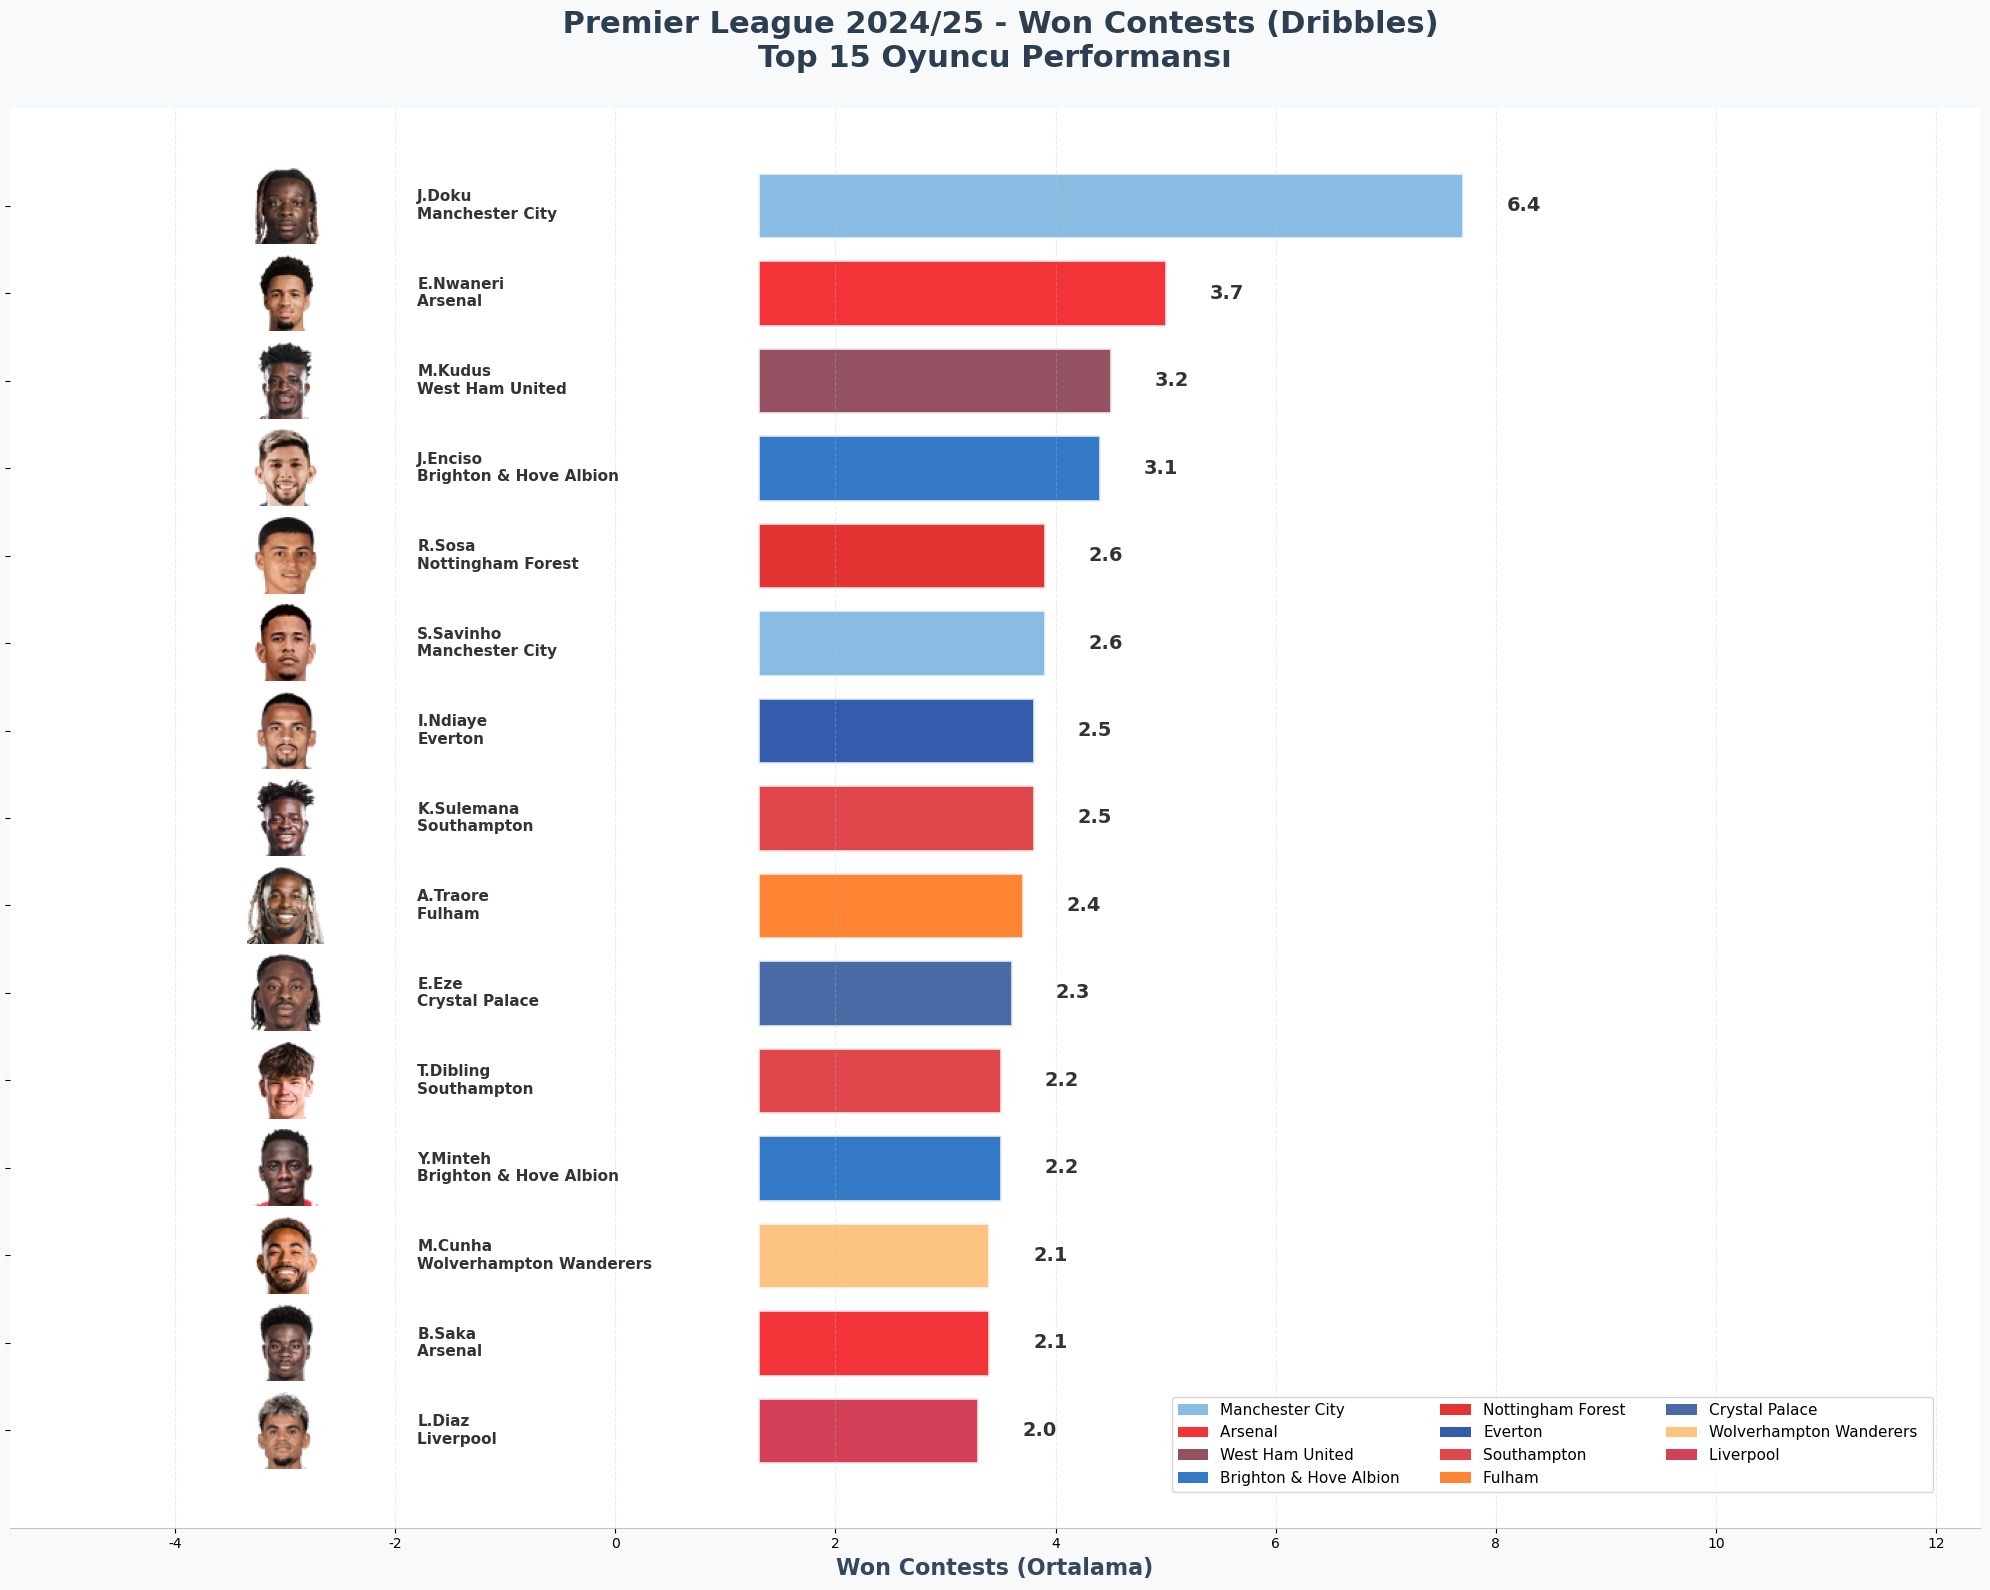


KULÜP BAZINDA ANALİZ:
                           Toplam  Ortalama  Oyuncu_Sayısı
Club                                                      
Manchester City               9.0       4.5              2
Arsenal                       5.8       2.9              2
Brighton & Hove Albion        5.3       2.7              2
Southampton                   4.7       2.4              2
West Ham United               3.2       3.2              1
Nottingham Forest             2.6       2.6              1
Everton                       2.5       2.5              1
Fulham                        2.4       2.4              1
Crystal Palace                2.3       2.3              1
Wolverhampton Wanderers       2.1       2.1              1
Liverpool                     2.0       2.0              1

CSV DOSYASI BİLGİLERİ:
Toplam oyuncu sayısı: 27
Kolonlar: ['Rank', 'Player', 'Won_Contests', 'Club']
En yüksek değer: 6.4
En düşük değer: 1.7
Ortalama: 2.4

RENK EŞLEŞTİRME KONTROLÜ:
1. J.Doku               | 

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import numpy as np


df = pd.read_csv("C:\\Users\\MONSTER\\Desktop\\fotmob stats\\won_contests_stats.csv")


required_columns = ['Player', 'Won_Contests', 'Club']
if not all(col in df.columns for col in required_columns):
    print("HATA: CSV dosyasında şu kolonlar bulunmalı:")
    print("- Player (oyuncu adı)")
    print("- Won_Contests (kazanılan ikili mücadele sayısı)")
    print("- Club (kulüp adı)")
    print(f"Mevcut kolonlar: {list(df.columns)}")
    exit()


club_colors = {
    
    'Arsenal': '#EF0107',
    'Arsenal FC': '#EF0107',
    
    
    'Manchester City': '#6CABDD',
    'Man City': '#6CABDD',
    
    
    'West Ham United': '#7A263A',
    'West Ham': '#7A263A',
    
    
    'Brighton & Hove Albion': '#0057B8',
    'Brighton': '#0057B8',
    
    
    'Nottingham Forest': '#DD0000',
    'Nott\'m Forest': '#DD0000',
    
    
    'Marseille': '#2FAAE0',
    
    
    'Southampton': '#D71920',
    'Southampton FC': '#D71920',
    
    
    'Fulham': '#FF6600',
    'Fulham FC': '#FF6600',
    
    
    'Crystal Palace': '#1B458F',
    'Crystal Palace FC': '#1B458F',
    
    
    'Wolverhampton Wanderers': '#FDB462',
    'Wolves': '#FDB462',
    
    
    'Liverpool': '#C8102E',
    'Liverpool FC': '#C8102E',
    
    
    'Chelsea': '#034694',
    'Chelsea FC': '#034694',
    
    
    'Manchester United': '#DA020E',
    'Man United': '#DA020E',
    
    
    'Newcastle United': '#241F20',
    'Newcastle': '#241F20',
    
   
    'Aston Villa': '#95BFE5',
    'Aston Villa FC': '#95BFE5',
    
    
    'Brentford': '#E30613',
    'Brentford FC': '#E30613',
    
    
    'Tottenham Hotspur': '#132257',
    'Tottenham': '#132257',
    'Spurs': '#132257',
    
   
    'Everton': '#003399',
    'Everton FC': '#003399',
    
    
    'Leicester City': '#003090',
    'Leicester': '#003090',
    
    
    'AFC Bournemouth': '#DA020E',
    'Bournemouth': '#DA020E',
    
    
    'Luton Town': '#F78F1E',
    'Luton': '#F78F1E',
    
    
    'Ipswich Town': '#0E63A6',
    'Ipswich': '#0E63A6'
}


def normalize_club_name(club_name):
    """Kulüp ismini normalize et ve renk eşleştirmesi için hazırla"""
   
    club_name = club_name.strip()
    
    
    name_mapping = {
        'Manchester City': 'Manchester City',
        'Man City': 'Manchester City',
        'West Ham United': 'West Ham United',
        'West Ham': 'West Ham United',
        'Brighton & Hove Albion': 'Brighton & Hove Albion',
        'Brighton': 'Brighton & Hove Albion',
        'Nottingham Forest': 'Nottingham Forest',
        'Nott\'m Forest': 'Nottingham Forest',
        'Wolverhampton Wanderers': 'Wolverhampton Wanderers',
        'Wolves': 'Wolverhampton Wanderers',
        'Tottenham Hotspur': 'Tottenham Hotspur',
        'Tottenham': 'Tottenham Hotspur',
        'Spurs': 'Tottenham Hotspur',
        'AFC Bournemouth': 'AFC Bournemouth',
        'Bournemouth': 'AFC Bournemouth',
        'Manchester United': 'Manchester United',
        'Man United': 'Manchester United'
    }
    
    return name_mapping.get(club_name, club_name)


print("CSV'deki kulüp isimleri:")
unique_clubs_in_csv = df['Club'].unique()
for club in unique_clubs_in_csv:
    normalized = normalize_club_name(club)
    color = club_colors.get(normalized, '#FF6B6B')  
    print(f"'{club}' → '{normalized}' → {color}")


player_images = {
    'J.Doku': 'https://images.fotmob.com/image_resources/playerimages/942368.png',
    'E.Nwaneri': 'https://images.fotmob.com/image_resources/playerimages/1254234.png',
    'M.Kudus': 'https://images.fotmob.com/image_resources/playerimages/891743.png',
    'J.Enciso': 'https://images.fotmob.com/image_resources/playerimages/1073742.png',
    'R.Sosa': 'https://images.fotmob.com/image_resources/playerimages/1132960.png',
    'S.Savinho': 'https://images.fotmob.com/image_resources/playerimages/1174337.png',
    'I.Ndiaye': 'https://images.fotmob.com/image_resources/playerimages/965764.png',
    'K.Sulemana': 'https://images.fotmob.com/image_resources/playerimages/1130691.png',
    'A.Traore': 'https://images.fotmob.com/image_resources/playerimages/493647.png',
    'E.Eze': 'https://images.fotmob.com/image_resources/playerimages/818975.png',
    'T.Dibling': 'https://images.fotmob.com/image_resources/playerimages/1292833.png',
    'Y.Minteh': 'https://images.fotmob.com/image_resources/playerimages/1400227.png',
    'B.Saka': 'https://images.fotmob.com/image_resources/playerimages/961995.png',
    'M.Cunha': 'https://images.fotmob.com/image_resources/playerimages/863098.png',
    'L.Diaz': 'https://images.fotmob.com/image_resources/playerimages/860914.png',
    'N.Madueke': 'https://images.fotmob.com/image_resources/playerimages/1084981.png',
    'S.Mavididi': 'https://images.fotmob.com/image_resources/playerimages/759580.png',
    'R.Barkley': 'https://images.fotmob.com/image_resources/playerimages/215384.png',
    'D.Spence': 'https://images.fotmob.com/image_resources/playerimages/894803.png',
    'A.Semenyo': 'https://images.fotmob.com/image_resources/playerimages/933576.png',
    'A.Amad': 'https://images.fotmob.com/image_resources/playerimages/1070052.png',
    'M.Rogers': 'https://images.fotmob.com/image_resources/playerimages/883080.png',
    'A.Wan-Bissaka': 'https://images.fotmob.com/image_resources/playerimages/760320.png',
    'R.Ait Nouri': 'https://images.fotmob.com/image_resources/playerimages/933845.png',
    'O.Hutchinson': 'https://images.fotmob.com/image_resources/playerimages/1215652.png',
    'K.Mitoma': 'https://images.fotmob.com/image_resources/playerimages/862608.png',
    'D.Ouattara': 'https://images.fotmob.com/image_resources/playerimages/1250253.png'
}

def download_image(url, timeout=10):
    """Resmi güvenli bir şekilde indir"""
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        
        response = requests.get(url, headers=headers, timeout=timeout)
        response.raise_for_status()
        
        img = Image.open(BytesIO(response.content))
        
        if img.mode != 'RGBA':
            img = img.convert('RGBA')
            
        return img
        
    except Exception as e:
        print(f"Resim yükleme hatası: {e}")
        return None

def create_placeholder_image(size=(60, 60)):
    """Placeholder resim oluştur"""
    img = Image.new('RGBA', size, (200, 200, 200, 255))
    return img


df_sorted = df.sort_values('Won_Contests', ascending=False)
available_players = df_sorted[df_sorted['Player'].isin(player_images.keys())].head(15).copy()


fig, ax = plt.subplots(figsize=(20, 16))

fig.patch.set_facecolor('#f8f9fa')
ax.set_facecolor('#ffffff')


y_positions = np.arange(len(available_players)) * 1.2
bar_heights = available_players['Won_Contests'].values


bar_colors = []
for club in available_players['Club']:
    normalized_club = normalize_club_name(club)
    color = club_colors.get(normalized_club, '#FF6B6B') 
    bar_colors.append(color)
    print(f"Kulüp: '{club}' → Normalize: '{normalized_club}' → Renk: {color}")


bars = ax.barh(y_positions, bar_heights, left=1.3, alpha=0.8, 
               edgecolor='white', linewidth=2, height=0.9)


for i, (bar, color) in enumerate(zip(bars, bar_colors)):
    bar.set_facecolor(color)
    bar.set_alpha(0.8)
    print(f"Bar {i+1} rengi ayarlandı: {color}")
    
    
    value = bar_heights[i]
    ax.text(value + 1.7, bar.get_y() + bar.get_height()/2, 
            f'{value}', ha='left', va='center', 
            fontweight='bold', fontsize=14, color='#333333')


for i, (idx, player) in enumerate(available_players.iterrows()):
    print(f"İşleniyor: {player['Player']}")
    
    
    img_url = player_images.get(player['Player'])
    
   
    img = download_image(img_url)
    
    
    if img is None:
        print(f"Resim indirilemedi, placeholder kullanılıyor: {player['Player']}")
        img = create_placeholder_image()
    
   
    img = img.resize((55, 55), Image.Resampling.LANCZOS)
    
    
    try:
        from matplotlib.offsetbox import OffsetImage, AnnotationBbox
        imagebox = OffsetImage(img, zoom=1.0)
        ab = AnnotationBbox(imagebox, (-3, y_positions[i]), 
                          frameon=False, pad=0.1)
        ax.add_artist(ab)
    except Exception as e:
        print(f"Resim ekleme hatası {player['Player']}: {e}")
    
    
    player_name = player['Player']
    club_name = player['Club']
    
    ax.text(-1.8, y_positions[i], f"{player_name}\n{club_name}", 
            ha='left', va='center', fontsize=11, fontweight='bold',
            color='#333333')


ax.set_title(' Premier League 2024/25 - Won Contests (Dribbles)\nTop 15 Oyuncu Performansı', 
             fontsize=22, fontweight='bold', pad=30, color='#2c3e50')

ax.set_xlabel('Won Contests (Ortalama)', fontsize=16, fontweight='bold', color='#34495e')
ax.set_ylabel('')


ax.set_yticks(y_positions)
ax.set_yticklabels([])  


ax.set_xlim(-5.5, max(bar_heights) + 6)


ax.grid(axis='x', alpha=0.3, linestyle='--', color='#bdc3c7')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#bdc3c7')


ax.invert_yaxis()


unique_clubs = available_players['Club'].unique()
unique_normalized_clubs = [normalize_club_name(club) for club in unique_clubs]
legend_elements = []
legend_labels = []

for i, club in enumerate(unique_clubs):
    normalized_club = normalize_club_name(club)
    color = club_colors.get(normalized_club, '#666666')
    legend_elements.append(plt.Rectangle((0,0),1,1, facecolor=color, alpha=0.8))
    legend_labels.append(club)  

ax.legend(legend_elements, legend_labels, loc='lower right', 
          bbox_to_anchor=(0.98, 0.02), ncol=3, fontsize=11)


plt.tight_layout()

print(f"\nGrafik hazır! {len(available_players)} oyuncu gösteriliyor.")
print(f"CSV dosyasından {len(df)} oyuncu yüklendi.")
print(f"Resim linki olan oyuncu sayısı: {len(df[df['Player'].isin(player_images.keys())])}")
print("\n" + "="*60)
print("TOP 15 WON CONTESTS (DRIBBLES):")
print("="*60)
for i, (_, player) in enumerate(available_players.iterrows()):
    print(f"{i+1:2d}. {player['Player']:<20} | {player['Club']:<25} | {player['Won_Contests']} ortalama")

plt.show()


print("\n" + "="*60)
print("KULÜP BAZINDA ANALİZ:")
print("="*60)
club_analysis = available_players.groupby('Club').agg({
    'Won_Contests': ['sum', 'mean', 'count']
}).round(1)
club_analysis.columns = ['Toplam', 'Ortalama', 'Oyuncu_Sayısı']
print(club_analysis.sort_values('Toplam', ascending=False))

print("\n" + "="*60)
print("CSV DOSYASI BİLGİLERİ:")
print("="*60)
print(f"Toplam oyuncu sayısı: {len(df)}")
print(f"Kolonlar: {list(df.columns)}")
print(f"En yüksek değer: {df['Won_Contests'].max()}")
print(f"En düşük değer: {df['Won_Contests'].min()}")
print(f"Ortalama: {df['Won_Contests'].mean():.1f}")


print("\n" + "="*60)
print("RENK EŞLEŞTİRME KONTROLÜ:")
print("="*60)
for i, (_, player) in enumerate(available_players.iterrows()):
    club = player['Club']
    normalized = normalize_club_name(club)
    color = club_colors.get(normalized, '#FF6B6B')
    print(f"{i+1}. {player['Player']:<20} | {club:<25} | {normalized:<25} | {color}")

## 90 Dk Başına Gol

CSV'deki takım isimleri:
1. Aston Villa  
2. Liverpool  
3. Fulham  
4. Newcastle United  
5. Manchester City  
6. Nottingham Forest  
7. Brentford  
8. Wolverhampton Wanderers  
9. Crystal Palace  
10. Everton  
11. Luton Town  
12. AFC Bournemouth  
13. Brighton & Hove Albion  
14. Tottenham Hotspur  
15. Arsenal  
16. Chelsea  
17. Ipswich Town  
J.Duran - Aston Villa   - #95BFE5
M.Salah - Liverpool   - #C8102E
R.Muniz - Fulham   - #000000
A.Isak - Newcastle United   - #241F20
E.Haaland - Manchester City   - #6CABDD
C.Wood - Nottingham Forest   - #DD0000
Y.Wissa - Brentford   - #E30613
O.Watkins - Aston Villa   - #95BFE5
B.Mbeumo - Brentford   - #E30613
L.Diaz - Liverpool   - #C8102E
J.Larsen - Wolverhampton Wanderers   - #FDB462
R.Barkley - Luton Town   - #FF8C00
H.Wilson - Fulham   - #000000
B.Beto - Everton   - #003399
J.Mateta - Crystal Palace   - #1B458F
İşleniyor: J.Duran
İşleniyor: M.Salah
İşleniyor: R.Muniz
İşleniyor: A.Isak
İşleniyor: E.Haaland
İşleniyor: C.Wood
İşleniyor: 

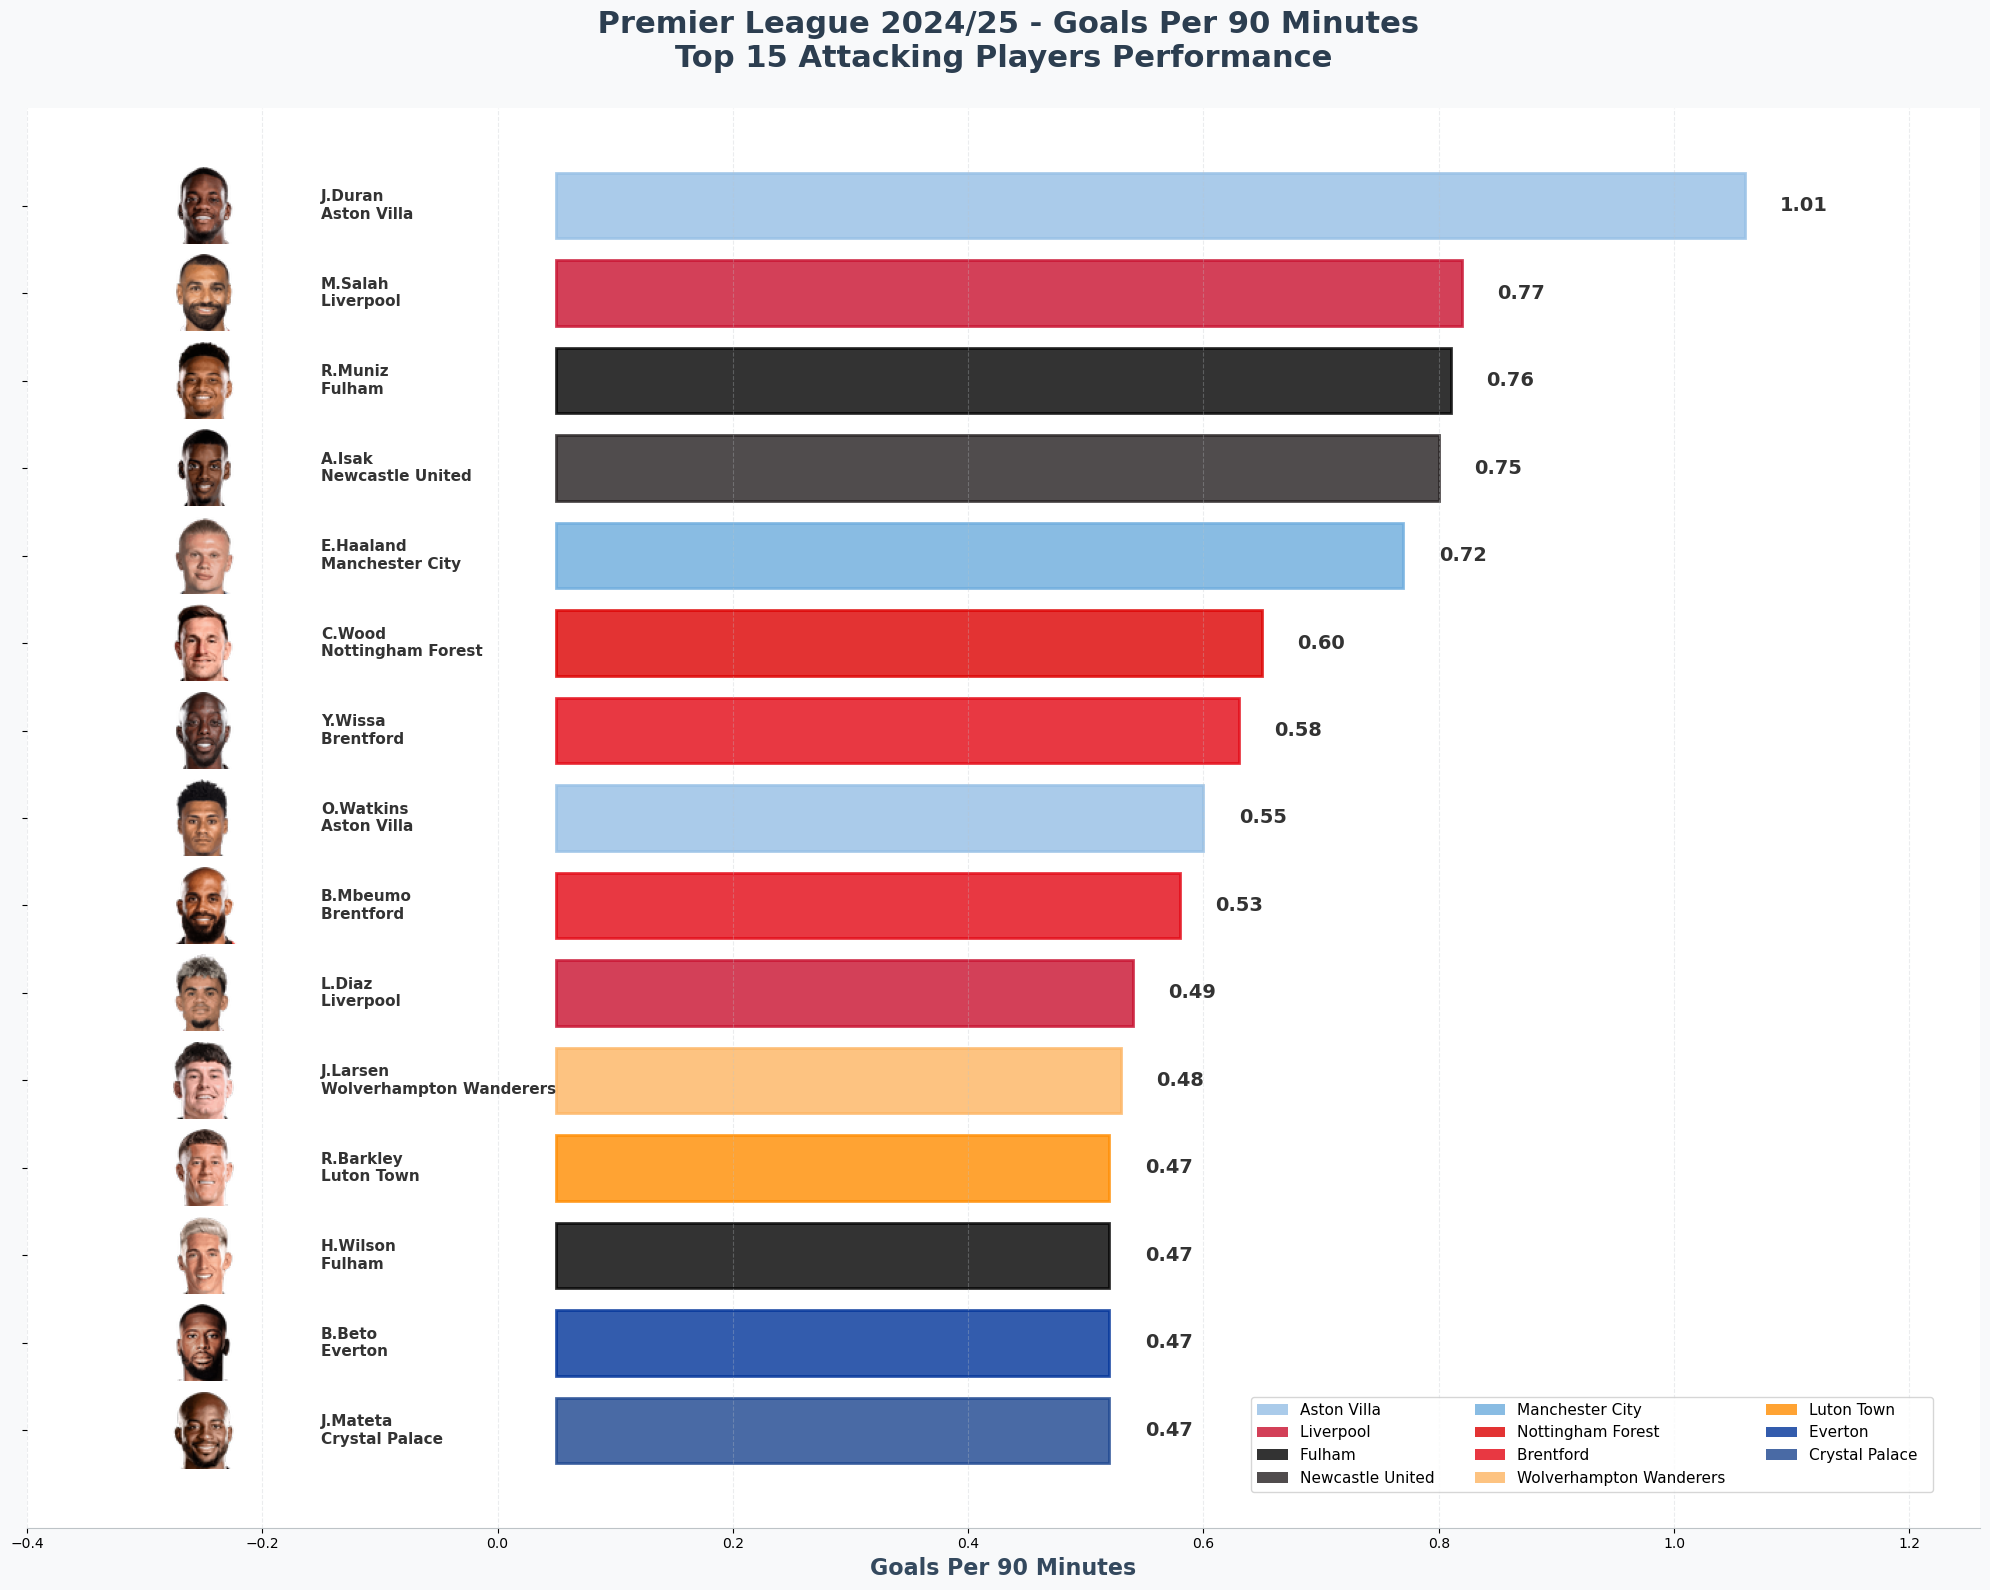


KULÜP BAZINDA ANALİZ:
                           Toplam  Ortalama  Oyuncu_Sayısı
Club                                                      
Aston Villa                  1.56      0.78              2
Newcastle United             0.75      0.75              1
Manchester City              0.72      0.72              1
Liverpool                    1.26      0.63              2
Fulham                       1.23      0.62              2
Nottingham Forest            0.60      0.60              1
Brentford                    1.11      0.55              2
Wolverhampton Wanderers      0.48      0.48              1
Crystal Palace               0.47      0.47              1
Everton                      0.47      0.47              1
Luton Town                   0.47      0.47              1

CSV DOSYASI BİLGİLERİ:
Toplam oyuncu sayısı: 27
Kolonlar: ['Rank', 'Player', 'Goals_Per_90', 'Club']
En yüksek değer: 1.01
En düşük değer: 0.42
Ortalama: 0.53

PERFORMANS KATEGORİLERİ:
Elite Scorers (>0.7 gol/

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import numpy as np


df = pd.read_csv("C:\\Users\\MONSTER\\Desktop\\fotmob stats\\goals_per_90_stats.csv")


required_columns = ['Player', 'Goals_Per_90']  
if not all(col in df.columns for col in required_columns):
    print("HATA: CSV dosyasında şu kolonlar bulunmalı:")
    print("- Player (oyuncu adı)")
    print("- Goals_Per_90 (90 dakika başına gol)")
    print(f"Mevcut kolonlar: {list(df.columns)}")
    exit()


print("CSV'deki takım isimleri:")
if 'Club' in df.columns:
    unique_clubs = df['Club'].unique()
    for i, club in enumerate(unique_clubs):
        print(f"{i+1}. {club}")
else:
    print("Club kolonu bulunamadı!")


club_colors = {
    
    'Arsenal': '#EF0107',
    'Nottingham Forest': '#DD0000',
    'Everton': '#003399',
    'Crystal Palace': '#1B458F',
    'Manchester City': '#6CABDD',
    'Chelsea': '#034694',
    'Liverpool': '#C8102E',
    'Manchester United': '#DA020E',
    'Newcastle United': '#241F20',
    'Aston Villa': '#95BFE5',
    'Wolverhampton Wanderers': '#FDB462',
    'Brentford': '#E30613',
    'Brighton & Hove Albion': '#0057B8',
    'Fulham': '#000000',
    'Tottenham Hotspur': '#132257',
    'West Ham United': '#7A263A',
    'Leicester City': '#003090',
    'AFC Bournemouth': '#DA020E',
    'Luton Town': '#FF8C00',
    'Ipswich Town': '#0000FF',
    
   
    'Arsenal FC': '#EF0107',
    'Nottingham Forest FC': '#DD0000',
    'Everton FC': '#003399',
    'Crystal Palace FC': '#1B458F',
    'Manchester City FC': '#6CABDD',
    'Chelsea FC': '#034694',
    'Liverpool FC': '#C8102E',
    'Manchester United FC': '#DA020E',
    'Newcastle United FC': '#241F20',
    'Aston Villa FC': '#95BFE5',
    'Wolverhampton Wanderers FC': '#FDB462',
    'Brentford FC': '#E30613',
    'Brighton & Hove Albion FC': '#0057B8',
    'Fulham FC': '#000000',
    'Tottenham Hotspur FC': '#132257',
    'West Ham United FC': '#7A263A',
    'Leicester City FC': '#003090',
    'AFC Bournemouth FC': '#DA020E',
    'Luton Town FC': '#FF8C00',
    'Ipswich Town FC': '#0000FF',
    
    
    'Arsenal': '#EF0107',
    'Nottingham': '#DD0000',
    'Everton': '#003399',
    'Crystal Palace': '#1B458F',
    'Manchester City': '#6CABDD',
    'Chelsea': '#034694',
    'Liverpool': '#C8102E',
    'Manchester United': '#DA020E',
    'Newcastle': '#241F20',
    'Aston Villa': '#95BFE5',
    'Wolverhampton': '#FDB462',
    'Wolves': '#FDB462',
    'Brentford': '#E30613',
    'Brighton': '#0057B8',
    'Fulham': '#000000',
    'Tottenham': '#132257',
    'Spurs': '#132257',
    'West Ham': '#7A263A',
    'Leicester': '#003090',
    'Bournemouth': '#DA020E',
    'Luton': '#FF8C00',
    'Ipswich': '#0000FF',
    
    
    'ARS': '#EF0107',
    'NFO': '#DD0000',
    'EVE': '#003399',
    'CRY': '#1B458F',
    'MCI': '#6CABDD',
    'CHE': '#034694',
    'LIV': '#C8102E',
    'MUN': '#DA020E',
    'NEW': '#241F20',
    'AVL': '#95BFE5',
    'WOL': '#FDB462',
    'BRE': '#E30613',
    'BHA': '#0057B8',
    'FUL': '#000000',
    'TOT': '#132257',
    'WHU': '#7A263A',
    'LEI': '#003090',
    'BOU': '#DA020E',
    'LUT': '#FF8C00',
    'IPS': '#0000FF'
}


def get_club_color(club_name):
    """Takım rengini bul - farklı formatları dene"""
    if not club_name or pd.isna(club_name):
        return '#666666'
    
 
    if club_name in club_colors:
        return club_colors[club_name]
    
    
    club_lower = club_name.lower()
    for key, color in club_colors.items():
        if key.lower() in club_lower or club_lower in key.lower():
            return color
    
    
    print(f"Renk bulunamadı: {club_name}")
    return '#666666'


player_images = {
    'J.Duran': 'https://images.fotmob.com/image_resources/playerimages/1088066.png',
    'M.Salah': 'https://images.fotmob.com/image_resources/playerimages/292462.png',
    'R.Muniz': 'https://images.fotmob.com/image_resources/playerimages/1128945.png',
    'A.Isak': 'https://images.fotmob.com/image_resources/playerimages/690107.png',
    'E.Haaland': 'https://images.fotmob.com/image_resources/playerimages/737066.png',
    'C.Wood': 'https://images.fotmob.com/image_resources/playerimages/169719.png',
    'Y.Wissa': 'https://images.fotmob.com/image_resources/playerimages/666857.png',
    'O.Watkins': 'https://images.fotmob.com/image_resources/playerimages/540088.png',
    'B.Mbeumo': 'https://images.fotmob.com/image_resources/playerimages/923312.png',
    'L.Diaz': 'https://images.fotmob.com/image_resources/playerimages/860914.png',
    'J.Larsen': 'https://images.fotmob.com/image_resources/playerimages/821100.png',
    'J.Mateta': 'https://images.fotmob.com/image_resources/playerimages/706297.png',
    'B.Beto': 'https://images.fotmob.com/image_resources/playerimages/1079485.png',
    'H.Wilson': 'https://images.fotmob.com/image_resources/playerimages/494417.png',
    'R.Barkley': 'https://images.fotmob.com/image_resources/playerimages/215384.png',
    'J.Kluivert': 'https://images.fotmob.com/image_resources/playerimages/794253.png',
    'C.Gakpo': 'https://images.fotmob.com/image_resources/playerimages/806552.png',
    'J.Pedro': 'https://images.fotmob.com/image_resources/playerimages/1021382.png',
    'B.Johnson': 'https://images.fotmob.com/image_resources/playerimages/1076756.png',
    'J.Maddison': 'https://images.fotmob.com/image_resources/playerimages/493165.png',
    'D.Jota': 'https://images.fotmob.com/image_resources/playerimages/570461.png',
    'R.Jimenez': 'https://images.fotmob.com/image_resources/playerimages/292313.png',
    'K.Schade': 'https://images.fotmob.com/image_resources/playerimages/1083796.png',
    'K.Havertz': 'https://images.fotmob.com/image_resources/playerimages/749736.png',
    'C.Palmer': 'https://images.fotmob.com/image_resources/playerimages/1096353.png',
    'D.Welbeck': 'https://images.fotmob.com/image_resources/playerimages/113836.png',
    'G.Hirst': 'https://images.fotmob.com/image_resources/playerimages/750033.png'
}

def download_image(url, timeout=10):
    """Resmi güvenli bir şekilde indir"""
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        
        response = requests.get(url, headers=headers, timeout=timeout)
        response.raise_for_status()
        
        img = Image.open(BytesIO(response.content))
        
        if img.mode != 'RGBA':
            img = img.convert('RGBA')
            
        return img
        
    except Exception as e:
        print(f"Resim yükleme hatası: {e}")
        return None

def create_placeholder_image(size=(60, 60)):
    """Placeholder resim oluştur"""
    img = Image.new('RGBA', size, (200, 200, 200, 255))
    return img


df_sorted = df.sort_values('Goals_Per_90', ascending=False)
available_players = df_sorted[df_sorted['Player'].isin(player_images.keys())].head(15).copy()


fig, ax = plt.subplots(figsize=(20, 16))


fig.patch.set_facecolor('#f8f9fa')
ax.set_facecolor('#ffffff')


y_positions = np.arange(len(available_players)) * 1.2
bar_heights = available_players['Goals_Per_90'].values


bar_colors = []
for _, player in available_players.iterrows():
    club = player.get('Club', 'Unknown')
    color = get_club_color(club)
    bar_colors.append(color)
    print(f"{player['Player']} - {club} - {color}")


bars = ax.barh(y_positions, bar_heights, left=0.05, color=bar_colors, alpha=0.8, 
               edgecolor='white', linewidth=2, height=0.9)


for i, (bar, color) in enumerate(zip(bars, bar_colors)):
  
    bar.set_color(color)
    
    
    value = bar_heights[i]
    ax.text(value + 0.08, bar.get_y() + bar.get_height()/2, 
            f'{value:.2f}', ha='left', va='center', 
            fontweight='bold', fontsize=14, color='#333333')


for i, (idx, player) in enumerate(available_players.iterrows()):
    print(f"İşleniyor: {player['Player']}")
    
    
    img_url = player_images.get(player['Player'])
    
    
    img = download_image(img_url)
    
    
    if img is None:
        print(f"Resim indirilemedi, placeholder kullanılıyor: {player['Player']}")
        img = create_placeholder_image()
    
    
    img = img.resize((55, 55), Image.Resampling.LANCZOS)
    
   
    try:
        from matplotlib.offsetbox import OffsetImage, AnnotationBbox
        imagebox = OffsetImage(img, zoom=1.0)
        ab = AnnotationBbox(imagebox, (-0.25, y_positions[i]), 
                          frameon=False, pad=0.1)
        ax.add_artist(ab)
    except Exception as e:
        print(f"Resim ekleme hatası {player['Player']}: {e}")
    
    
    player_name = player['Player']
    club_name = player['Club'] if 'Club' in player.index else 'Unknown'
    
    ax.text(-0.15, y_positions[i], f"{player_name}\n{club_name}", 
            ha='left', va='center', fontsize=11, fontweight='bold',
            color='#333333')


ax.set_title(' Premier League 2024/25 - Goals Per 90 Minutes\nTop 15 Attacking Players Performance', 
             fontsize=22, fontweight='bold', pad=30, color='#2c3e50')

ax.set_xlabel('Goals Per 90 Minutes', fontsize=16, fontweight='bold', color='#34495e')
ax.set_ylabel('')

ax.set_yticks(y_positions)
ax.set_yticklabels([])  


ax.set_xlim(-0.4, max(bar_heights) + 0.25)


ax.grid(axis='x', alpha=0.3, linestyle='--', color='#bdc3c7')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#bdc3c7')


ax.invert_yaxis()


if 'Club' in available_players.columns:
    unique_clubs = available_players['Club'].unique()
    legend_elements = []
    legend_labels = []
    
    for club in unique_clubs:
        color = get_club_color(club)
        legend_elements.append(plt.Rectangle((0,0),1,1, facecolor=color, alpha=0.8))
        legend_labels.append(club)
    
    ax.legend(legend_elements, legend_labels, loc='lower right', 
              bbox_to_anchor=(0.98, 0.02), ncol=3, fontsize=11)


plt.tight_layout()

print(f"\nGrafik hazır! {len(available_players)} oyuncu gösteriliyor.")
print(f"CSV dosyasından {len(df)} oyuncu yüklendi.")
print(f"Resim linki olan oyuncu sayısı: {len(df[df['Player'].isin(player_images.keys())])}")


print("\n" + "="*60)
print("RENK EŞLEŞTİRME KONTROL:")
print("="*60)
if 'Club' in available_players.columns:
    for _, player in available_players.iterrows():
        club = player['Club']
        color = get_club_color(club)
        print(f"{player['Player']:<20} | {club:<25} | {color}")

print("\n" + "="*60)
print("TOP 15 GOALS PER 90:")
print("="*60)
for i, (_, player) in enumerate(available_players.iterrows()):
    print(f"{i+1:2d}. {player['Player']:<20} | {player.get('Club', 'Unknown'):<25} | {player['Goals_Per_90']:.2f} gol/90dk")

plt.show()


if 'Club' in df.columns:
    print("\n" + "="*60)
    print("KULÜP BAZINDA ANALİZ:")
    print("="*60)
    club_analysis = available_players.groupby('Club').agg({
        'Goals_Per_90': ['sum', 'mean', 'count']
    }).round(2)
    club_analysis.columns = ['Toplam', 'Ortalama', 'Oyuncu_Sayısı']
    print(club_analysis.sort_values('Ortalama', ascending=False))

print("\n" + "="*60)
print("CSV DOSYASI BİLGİLERİ:")
print("="*60)
print(f"Toplam oyuncu sayısı: {len(df)}")
print(f"Kolonlar: {list(df.columns)}")
print(f"En yüksek değer: {df['Goals_Per_90'].max():.2f}")
print(f"En düşük değer: {df['Goals_Per_90'].min():.2f}")
print(f"Ortalama: {df['Goals_Per_90'].mean():.2f}")


print("\n" + "="*60)
print("PERFORMANS KATEGORİLERİ:")
print("="*60)
print(f"Elite Scorers (>0.7 gol/90dk): {len(df[df['Goals_Per_90'] > 0.7])}")
print(f"High Scorers (0.5-0.7 gol/90dk): {len(df[(df['Goals_Per_90'] >= 0.5) & (df['Goals_Per_90'] <= 0.7)])}")
print(f"Regular Scorers (0.3-0.5 gol/90dk): {len(df[(df['Goals_Per_90'] >= 0.3) & (df['Goals_Per_90'] < 0.5)])}")
print(f"Low Scorers (<0.3 gol/90dk): {len(df[df['Goals_Per_90'] < 0.3])}")

## 90 Dk Başına İsabetli Pas Ortalaması

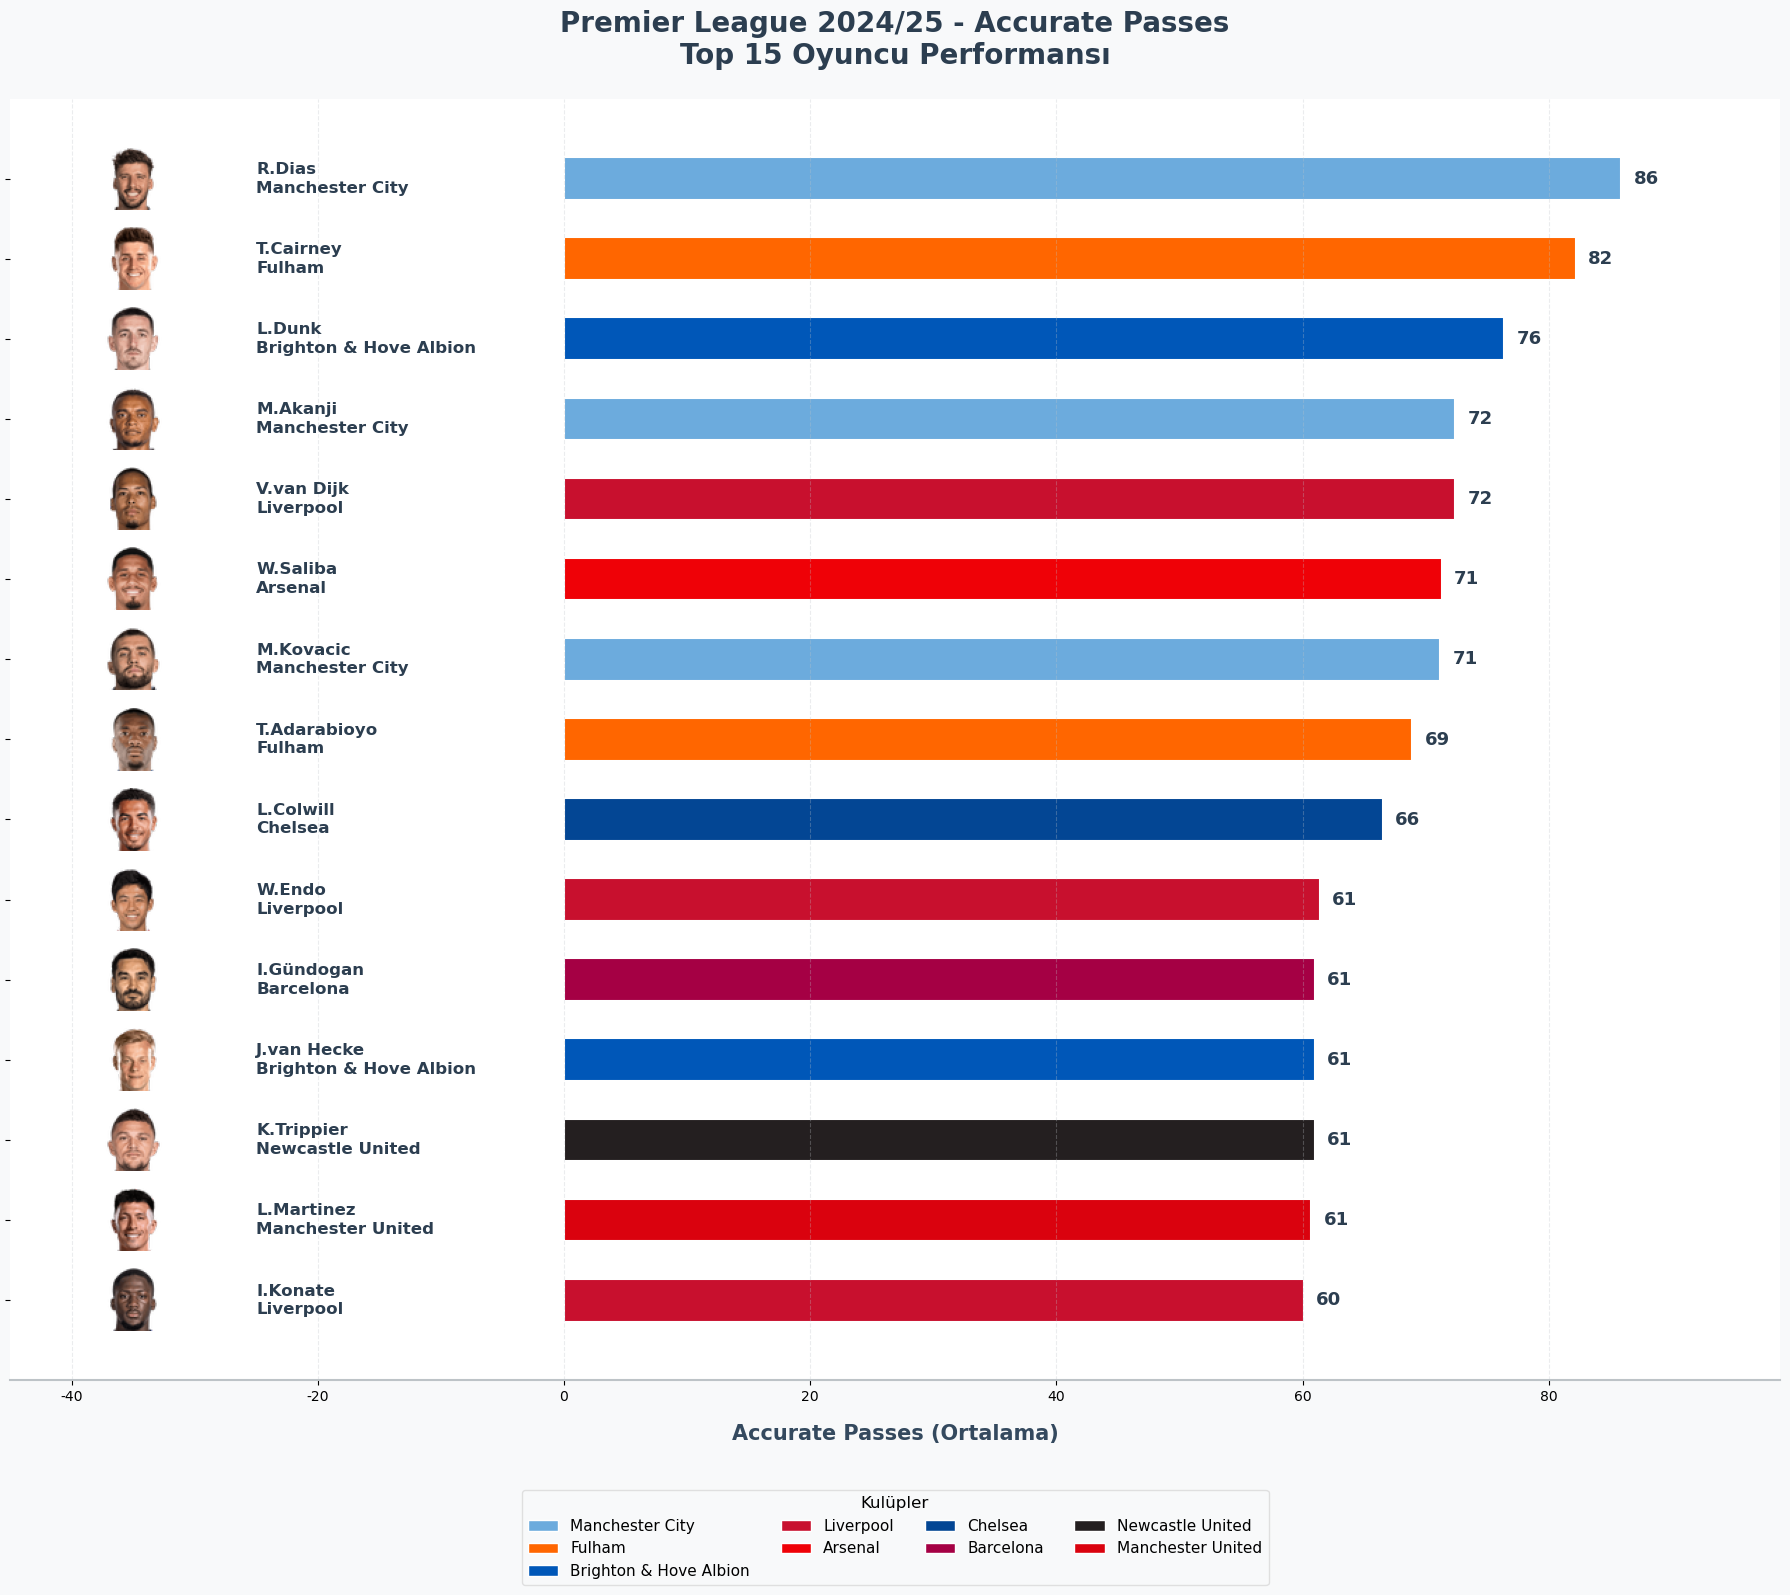

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import numpy as np


df = pd.read_csv("C:\\Users\\MONSTER\\Desktop\\fotmob stats\\accurate_passes_stats.csv", encoding='ISO-8859-1')


required_columns = ['Player', 'Accurate_Passes', 'Club']
if not all(col in df.columns for col in required_columns):
    print("Eksik kolonlar var.")
    exit()


club_colors = {
    'Arsenal': '#EF0107', 'Manchester City': '#6CABDD', 'West Ham United': '#7A263A',
    'Brighton & Hove Albion': '#0057B8', 'Nottingham Forest': '#DD0000', 'Marseille': '#2FAAE0',
    'Southampton': '#D71920', 'Fulham': '#FF6600', 'Crystal Palace': '#1B458F',
    'Wolverhampton Wanderers': '#FDB462', 'Liverpool': '#C8102E', 'Chelsea': '#034694',
    'Manchester United': '#DA020E', 'Newcastle United': '#241F20', 'Aston Villa': '#95BFE5',
    'Brentford': '#E30613', 'Tottenham Hotspur': '#132257', 'Everton': '#003399',
    'Leicester City': '#003090', 'AFC Bournemouth': '#DA020E', 'Luton Town': '#F78F1E',
    'Ipswich Town': '#0E63A6', 'Barcelona': '#A50044', 'Bayern Munich': '#DC052D', 'Lille': '#E20A16'
}


def normalize_club_name(club):
    mapping = {
        'Man City': 'Manchester City', 'West Ham': 'West Ham United',
        'Brighton': 'Brighton & Hove Albion', 'Nott\'m Forest': 'Nottingham Forest',
        'Wolves': 'Wolverhampton Wanderers', 'Tottenham': 'Tottenham Hotspur',
        'Spurs': 'Tottenham Hotspur', 'Man United': 'Manchester United',
        'Bournemouth': 'AFC Bournemouth', 'FC Barcelona': 'Barcelona',
        'FC Bayern München': 'Bayern Munich', 'LOSC Lille': 'Lille'
    }
    return mapping.get(club.strip(), club.strip())

player_images = {
    'R.Dias': 'https://images.fotmob.com/image_resources/playerimages/614006.png',
    'T.Cairney': 'https://images.fotmob.com/image_resources/playerimages/182962.png',
    'L.Dunk': 'https://images.fotmob.com/image_resources/playerimages/201690.png',
    'M.Akanji': 'https://images.fotmob.com/image_resources/playerimages/521318.png',
    'V.van Dijk': 'https://images.fotmob.com/image_resources/playerimages/209405.png',
    'W.Saliba': 'https://images.fotmob.com/image_resources/playerimages/955406.png',
    'M.Kovacic': 'https://images.fotmob.com/image_resources/playerimages/239219.png',
    'T.Adarabioyo': 'https://images.fotmob.com/image_resources/playerimages/683402.png',
    'L.Colwill': 'https://images.fotmob.com/image_resources/playerimages/1096400.png',
    'W.Endo': 'https://images.fotmob.com/image_resources/playerimages/202643.png',
    'I.Gündogan': 'https://images.fotmob.com/image_resources/playerimages/178818.png',
    'J.van Hecke': 'https://images.fotmob.com/image_resources/playerimages/974618.png',
    'K.Trippier': 'https://images.fotmob.com/image_resources/playerimages/191869.png',
    'L.Martinez': 'https://images.fotmob.com/image_resources/playerimages/847983.png',
    'I.Konate': 'https://images.fotmob.com/image_resources/playerimages/820140.png',
}


def download_image(url):
    try:
        headers = {'User-Agent': 'Mozilla/5.0'}
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        return Image.open(BytesIO(response.content)).convert('RGBA')
    except:
        return Image.new('RGBA', (60, 60), (200, 200, 200, 255))


df_sorted = df.sort_values('Accurate_Passes', ascending=False)
available_players = df_sorted[df_sorted['Player'].isin(player_images)].head(15).copy()


fig, ax = plt.subplots(figsize=(18, 16))  
fig.patch.set_facecolor('#f8f9fa')
ax.set_facecolor('#ffffff')


y_positions = np.arange(len(available_players)) * 1.5 
bar_height = 0.8  

bar_heights = available_players['Accurate_Passes'].values
bar_colors = [club_colors.get(normalize_club_name(club), '#FF6B6B') for club in available_players['Club']]

bars = ax.barh(y_positions, bar_heights, color=bar_colors, 
               edgecolor='white', linewidth=1.5, height=bar_height)


for bar, value in zip(bars, bar_heights):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
            f'{value:.0f}', ha='left', va='center', fontsize=13, 
            fontweight='bold', color='#2c3e50')


image_x = -35  
text_x = -25   
image_size = 45  

for i, (_, player) in enumerate(available_players.iterrows()):
    name = player['Player']
    club = player['Club']
    img = download_image(player_images[name]).resize((image_size, image_size), Image.Resampling.LANCZOS)

    from matplotlib.offsetbox import OffsetImage, AnnotationBbox
    imagebox = OffsetImage(img, zoom=1)
    ab = AnnotationBbox(imagebox, (image_x, y_positions[i]), frameon=False)
    ax.add_artist(ab)

    
    ax.text(text_x, y_positions[i], f"{name}\n{club}", ha='left', va='center', 
            fontsize=12, fontweight='bold', color='#2c3e50', linespacing=1.3)


ax.set_title('Premier League 2024/25 - Accurate Passes\nTop 15 Oyuncu Performansı',
             fontsize=20, fontweight='bold', color='#2c3e50', pad=25)
ax.set_xlabel('Accurate Passes (Ortalama)', fontsize=15, fontweight='bold', color='#34495e', labelpad=15)
ax.set_yticks(y_positions)
ax.set_yticklabels([])
ax.set_xlim(image_x - 10, max(bar_heights) * 1.15)  
ax.invert_yaxis()


ax.grid(axis='x', alpha=0.3, linestyle='--', color='#bdc3c7')
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_color('#bdc3c7')
ax.spines['bottom'].set_linewidth(1.5)


unique_clubs = available_players['Club'].unique()
legend_elements = []
for club in unique_clubs:
    norm_club = normalize_club_name(club)
    color = club_colors.get(norm_club, '#888888')
    legend_elements.append(plt.Rectangle((0, 0), 1, 1, facecolor=color, edgecolor='white'))


legend = ax.legend(legend_elements, unique_clubs, 
                  loc='upper center', 
                  bbox_to_anchor=(0.5, -0.08),
                  fontsize=11, 
                  ncol=4,
                  title='Kulüpler',
                  title_fontsize=12,
                  frameon=True,
                  framealpha=0.9,
                  edgecolor='#dddddd')
legend.get_frame().set_facecolor('#f8f9fa')

plt.subplots_adjust(bottom=0.12)  
plt.tight_layout()
plt.show()